In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import pandas as pd
import matplotlib as mpl
import numpy as np

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 2

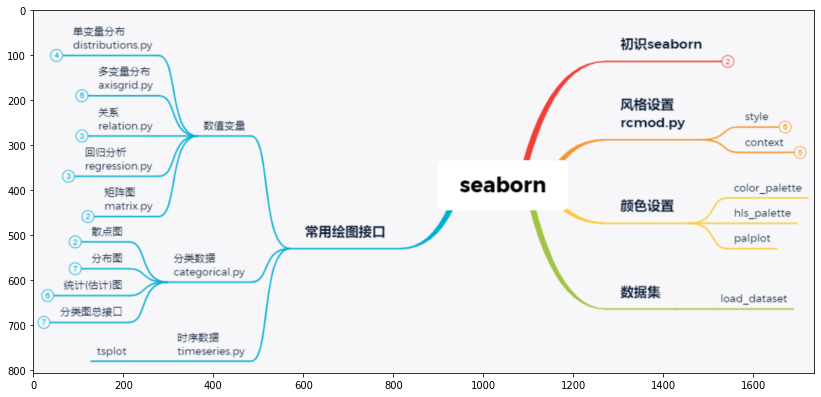

In [2]:
imgw = r"C:\python\function\testfile\seaborn_guidline.PNG"    #使用下面这种形式,只能给绝对路径

with cbook.get_sample_data(imgw) as im_file:
    im = plt.imread(im_file)

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
ax.imshow(im)

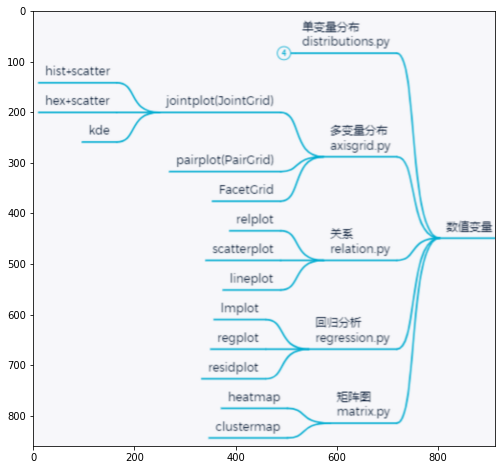

In [3]:
img = r"..\testfile\seaborn_variance.PNG"

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()
im = plt.imread(img)
ax.imshow(im)

In [3]:
dtpath = r"..\testfile\mc03test.csv"
dt = pd.read_csv(dtpath,index_col=0,parse_dates=True)
dt["hour"] = dt.index.strftime("%Y-%m-%d %H")
dt.head(1)

,PmSetupId,ProductionOrder,BinCode,SubstrateSessionId,PmTrayId,PmRefId,PmRefCalibDate,PmPlaus1Id,PmPlaus2Id,RhTRef1Id,RhTRef2Id,RhTAtmId,RhTSagId,AtmHeatingDeviceCurrent,VoltageIn,VoltageSclTx,VoltageSdaRx,VoltageIfSelect,VoltageBoot,VoltageShieldTest,DutFirmwareMajorVersion,DutFirmwareMinorVersion,DeleteSuccessful,DeleteCalibrationSuccessful,ProductionDate,ProductionDateIsPass,ProductionDateIsWritten,NumberOfDuts,DeviceId,DeviceIdInternal,MicrocontrollerId,ReadLmCalibBin,ReadPmCalibBin,ReadAllBinsGoodQualityIndicator,AutoCleaningInterval_Reset,SetTargetFanSpeed,SetUpdateInterval,SetPeakThreshold,SetPeakClippingLimit,SetLaserSetPoint,SetNoiseSuppression,PhotoTicksLaserOff,PhotoTicksLaserOn,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,ZeroInterceptPM10p0NumbConcRef_1,ZeroInterceptPM10p0MeanPartMassRef_1,Pm0p5NumbConcSPS1Ratio_1,Pm1p0NumbConcSPS1Ratio_1,Pm2p5NumbConcSPS1Ratio_1,Pm4p0NumbConcSPS1Ratio_1,Pm10p0NumbConcSPS1Ratio_1,Pm1p0MassConcSPS1Ratio_1,Pm2p5MassConcSPS1Ratio_1,Pm4p0MassConcSPS1Ratio_1,Pm10p0MassConcSPS1Ratio_1,Pm0p5NumbConcSPS2Ratio_1,Pm1p0NumbConcSPS2Ratio_1,Pm2p5NumbConcSPS2Ratio_1,Pm4p0NumbConcSPS2Ratio_1,Pm10p0NumbConcSPS2Ratio_1,Pm1p0MassConcSPS2Ratio_1,Pm2p5MassConcSPS2Ratio_1,Pm4p0MassConcSPS2Ratio_1,Pm10p0MassConcSPS2Ratio_1,T1RefMean_1,Rh1RefMean_1,T2RefMean_1,RH2RefMean_1,TAtmRefMean_1,RhAtmRefMean_1,TSagRefMean_1,RhSagRefMean_1,AmbientPressureRefMean_1,AirFlowRefMean_1,TTsiMean_1,DecayRatePM2p5NumbConcRef_1,NoisePM2p5NumbConcRef_1,PreCleaningTime_1,PostCleanPm10P0NumbConcMean_1,PostCleanPm10P0MassConcMean_1,FanSpeedMedian_1,FanVoltageMedian_1,FanSpeedStd_1,FanVoltageStd_1,PmNormRate_1,TotalCounts_1,ZeroInterceptPM2p5NumbConcRef_2,ZeroInterceptPM2p5MeanPartMassRef_2,ZeroInterceptPM10p0NumbConcRef_2,ZeroInterceptPM10p0MeanPartMassRef_2,Pm0p5NumbConcSPS1Ratio_2,Pm1p0NumbConcSPS1Ratio_2,Pm2p5NumbConcSPS1Ratio_2,Pm4p0NumbConcSPS1Ratio_2,Pm10p0NumbConcSPS1Ratio_2,Pm1p0MassConcSPS1Ratio_2,Pm2p5MassConcSPS1Ratio_2,Pm4p0MassConcSPS1Ratio_2,Pm10p0MassConcSPS1Ratio_2,Pm0p5NumbConcSPS2Ratio_2,Pm1p0NumbConcSPS2Ratio_2,Pm2p5NumbConcSPS2Ratio_2,Pm4p0NumbConcSPS2Ratio_2,Pm10p0NumbConcSPS2Ratio_2,Pm1p0MassConcSPS2Ratio_2,Pm2p5MassConcSPS2Ratio_2,Pm4p0MassConcSPS2Ratio_2,Pm10p0MassConcSPS2Ratio_2,T1RefMean_2,Rh1RefMean_2,T2RefMean_2,RH2RefMean_2,TAtmRefMean_2,RhAtmRefMean_2,TSagRefMean_2,RhSagRefMean_2,AmbientPressureRefMean_2,AirFlowRefMean_2,TTsiMean_2,DecayRatePM2p5NumbConcRef_2,NoisePM2p5NumbConcRef_2,PreCleaningTime_2,PostCleanPm10P0NumbConcMean_2,PostCleanPm10P0MassConcMean_2,FanSpeedMedian_2,FanVoltageMedian_2,FanSpeedStd_2,FanVoltageStd_2,PmNormRate_2,TotalCounts_2,CalculationSuccessful,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,KclHyp_2,KclHyp_3,KclHyp_4,KclHyp_5,ArzHyp_0,ArzHyp_1,ArzHyp_2,ArzHyp_3,ArzHyp_4,ArzHyp_5,Omega,GainKclMc_0p5,GainKclMc_1p0,GainKclMc_2p5,GainKclMc_4p0,GainKclMc_10p0,GainKclNc_0p5,GainKclNc_1p0,GainKclNc_2p5,GainKclNc_4p0,GainKclNc_10p0,GainArzMc_0p5,GainArzMc_1p0,GainArzMc_2p5,GainArzMc_4p0,GainArzMc_10p0,GainArzNc_0p5,GainArzNc_1p0,GainArzNc_2p5,GainArzNc_4p0,GainArzNc_10p0,WriteCalibrationSuccessful,ZeroInterceptPM2p5NumbConcRef_Remeasurement,ZeroInterceptPM2p5MeanPartMassRef_Remeasurement,ZeroInterceptPM10p0NumbConcRef_Remeasurement,ZeroInterceptPM10p0MeanPartMassRef_Remeasurement,Pm0p5NumbConcSPS1Ratio_Remeasurement,Pm1p0NumbConcSPS1Ratio_Remeasurement,Pm2p5NumbConcSPS1Ratio_Remeasurement,Pm4p0NumbConcSPS1Ratio_Remeasurement,Pm10p0NumbConcSPS1Ratio_Remeasurement,Pm1p0MassConcSPS1Ratio_Remeasurement,Pm2p5MassConcSPS1Ratio_Remeasurement,Pm4p0MassConcSPS1Ratio_Remeasurement,Pm10p0MassConcSPS1Ratio_Remeasurement,Pm0p5NumbConcSPS2Ratio_Remeasurement,Pm1p0NumbConcSPS2Ratio_Remeasurement,Pm2p5NumbConcSPS2Ratio_Remeasurement,Pm4p0NumbConcSPS2Ratio_Remeasurement,Pm10p0NumbConcSPS2Ratio_Remeasurement,Pm1p0MassConcSPS2Ratio_Remeasurement,Pm2p5MassConcSPS2Ratio_Remeasurement,Pm4p0MassConcSPS2Ratio_Remeasurement,Pm10p0MassConcSPS2Ratio_Remeasurement,T1RefMean

In [2]:
snspath = r"..\testfile\snstestdata.csv"
snsdata = pd.read_csv(snspath,index_col=0)
snsdata.head(1)

,PmSetupId,ProductionOrder,BinCode,SubstrateSessionId,PmTrayId,PmRefId,PmRefCalibDate,PmPlaus1Id,PmPlaus2Id,DeviceId,DeviceIdInternal,DeviceIdInternal_UTL,DeviceIdInternal_LTL,ReadPmCalibBin,ReadPmCalibBin_UTL,ReadPmCalibBin_LTL,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5NumbConcRef_1_UTL,ZeroInterceptPM2p5NumbConcRef_1_LTL,ZeroInterceptPM2p5MeanPartMassRef_1,ZeroInterceptPM2p5MeanPartMassRef_1_UTL,ZeroInterceptPM2p5MeanPartMassRef_1_LTL,ZeroInterceptPM10p0NumbConcRef_1,ZeroInterceptPM10p0NumbConcRef_1_UTL,ZeroInterceptPM10p0NumbConcRef_1_LTL,ZeroInterceptPM10p0MeanPartMassRef_1,ZeroInterceptPM10p0MeanPartMassRef_1_UTL,ZeroInterceptPM10p0MeanPartMassRef_1_LTL,Pm0p5NumbConcSPS1Ratio_1,Pm0p5NumbConcSPS1Ratio_1_UTL,Pm0p5NumbConcSPS1Ratio_1_LTL,Pm1p0NumbConcSPS1Ratio_1,Pm1p0NumbConcSPS1Ratio_1_UTL,Pm1p0NumbConcSPS1Ratio_1_LTL,Pm2p5NumbConcSPS1Ratio_1,Pm2p5NumbConcSPS1Ratio_1_UTL,Pm2p5NumbConcSPS1Ratio_1_LTL,Pm4p0NumbConcSPS1Ratio_1,Pm4p0NumbConcSPS1Ratio_1_UTL,Pm4p0NumbConcSPS1Ratio_1_LTL,Pm10p0NumbConcSPS1Ratio_1,Pm10p0NumbConcSPS1Ratio_1_UTL,Pm10p0NumbConcSPS1Ratio_1_LTL,Pm1p0MassConcSPS1Ratio_1,Pm1p0MassConcSPS1Ratio_1_UTL,Pm1p0MassConcSPS1Ratio_1_LTL,Pm2p5MassConcSPS1Ratio_1,Pm2p5MassConcSPS1Ratio_1_UTL,Pm2p5MassConcSPS1Ratio_1_LTL,Pm4p0MassConcSPS1Ratio_1,Pm4p0MassConcSPS1Ratio_1_UTL,Pm4p0MassConcSPS1Ratio_1_LTL,Pm10p0MassConcSPS1Ratio_1,Pm10p0MassConcSPS1Ratio_1_UTL,Pm10p0MassConcSPS1Ratio_1_LTL,Pm0p5NumbConcSPS2Ratio_1,Pm0p5NumbConcSPS2Ratio_1_UTL,Pm0p5NumbConcSPS2Ratio_1_LTL,Pm1p0NumbConcSPS2Ratio_1,Pm1p0NumbConcSPS2Ratio_1_UTL,Pm1p0NumbConcSPS2Ratio_1_LTL,Pm2p5NumbConcSPS2Ratio_1,Pm2p5NumbConcSPS2Ratio_1_UTL,Pm2p5NumbConcSPS2Ratio_1_LTL,Pm4p0NumbConcSPS2Ratio_1,Pm4p0NumbConcSPS2Ratio_1_UTL,Pm4p0NumbConcSPS2Ratio_1_LTL,Pm10p0NumbConcSPS2Ratio_1,Pm10p0NumbConcSPS2Ratio_1_UTL,Pm10p0NumbConcSPS2Ratio_1_LTL,Pm1p0MassConcSPS2Ratio_1,Pm1p0MassConcSPS2Ratio_1_UTL,Pm1p0MassConcSPS2Ratio_1_LTL,Pm2p5MassConcSPS2Ratio_1,Pm2p5MassConcSPS2Ratio_1_UTL,Pm2p5MassConcSPS2Ratio_1_LTL,Pm4p0MassConcSPS2Ratio_1,Pm4p0MassConcSPS2Ratio_1_UTL,Pm4p0MassConcSPS2Ratio_1_LTL,Pm10p0MassConcSPS2Ratio_1,Pm10p0MassConcSPS2Ratio_1_UTL,Pm10p0MassConcSPS2Ratio_1_LTL,DecayRatePM2p5NumbConcRef_1,DecayRatePM2p5NumbConcRef_1_UTL,DecayRatePM2p5NumbConcRef_1_LTL,NoisePM2p5NumbConcRef_1,NoisePM2p5NumbConcRef_1_UTL,NoisePM2p5NumbConcRef_1_LTL,PostCleanPm10P0NumbConcMean_1,PostCleanPm10P0NumbConcMean_1_UTL,PostCleanPm10P0NumbConcMean_1_LTL,PostCleanPm10P0MassConcMean_1,PostCleanPm10P0MassConcMean_1_UTL,PostCleanPm10P0MassConcMean_1_LTL,PmNormRate_1,PmNormRate_1_UTL,PmNormRate_1_LTL,TotalCounts_1,TotalCounts_1_UTL,TotalCounts_1_LTL,ZeroInterceptPM2p5NumbConcRef_2,ZeroInterceptPM2p5NumbConcRef_2_UTL,ZeroInterceptPM2p5NumbConcRef_2_LTL,ZeroInterceptPM2p5MeanPartMassRef_2,ZeroInterceptPM2p5MeanPartMassRef_2_UTL,ZeroInterceptPM2p5MeanPartMassRef_2_LTL,ZeroInterceptPM10p0NumbConcRef_2,ZeroInterceptPM10p0NumbConcRef_2_UTL,ZeroInterceptPM10p0NumbConcRef_2_LTL,ZeroInterceptPM10p0MeanPartMassRef_2,ZeroInterceptPM10p0MeanPartMassRef_2_UTL,ZeroInterceptPM10p0MeanPartMassRef_2_LTL,Pm0p5NumbConcSPS1Ratio_2,Pm0p5NumbConcSPS1Ratio_2_UTL,Pm0p5NumbConcSPS1Ratio_2_LTL,Pm1p0NumbConcSPS1Ratio_2,Pm1p0NumbConcSPS1Ratio_2_UTL,Pm1p0NumbConcSPS1Ratio_2_LTL,Pm2p5NumbConcSPS1Ratio_2,Pm2p5NumbConcSPS1Ratio_2_UTL,Pm2p5NumbConcSPS1Ratio_2_LTL,Pm4p0NumbConcSPS1Ratio_2,Pm4p0NumbConcSPS1Ratio_2_UTL,Pm4p0NumbConcSPS1Ratio_2_LTL,Pm10p0NumbConcSPS1Ratio_2,Pm10p0NumbConcSPS1Ratio_2_UTL,Pm10p0NumbConcSPS1Ratio_2_LTL,Pm1p0MassConcSPS1Ratio_2,Pm1p0MassConcSPS1Ratio_2_UTL,Pm1p0MassConcSPS1Ratio_2_LTL,Pm2p5MassConcSPS1Ratio_2,Pm2p5MassConcSPS1Ratio_2_UTL,Pm2p5MassConcSPS1Ratio_2_LTL,Pm4p0MassConcSPS1Ratio_2,Pm4p0MassConcSPS1Ratio_2_UTL,Pm4p0MassConcSPS1Ratio_2_LTL,Pm10p0MassConcSPS1Ratio_2,Pm10p0MassConcSPS1Ratio_2_UTL,Pm10p0MassConcSPS1Ratio_2_LTL,Pm0p5NumbConcSPS2Ratio_2,Pm0p5NumbConcSPS2Ratio_2_UTL,Pm0p5NumbConcSPS2Ratio_2_LTL,Pm1p0NumbConcSPS2Ratio_2,Pm1p0NumbConcSPS2Ratio_2_UTL,Pm1p0NumbConcSPS2R

# 相关性绘图 Relational plots

## relplot:关系图

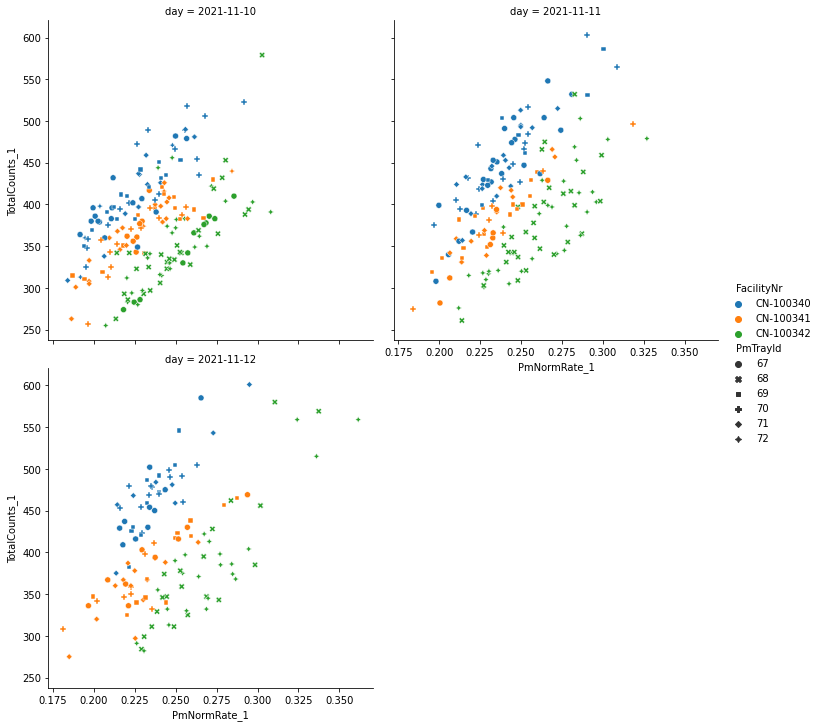

In [6]:
sns.relplot(data=dt,
            x="PmNormRate_1",    #第一个维度
            y="TotalCounts_1",   #第二个维度
            hue="FacilityNr",    #第三个维度
            style="PmTrayId",    #第四个维度,用形状区分
#             size="day",          #第五个维度,点的大小,线条的粗细区分
            hue_order=["CN-100340","CN-100341","CN-100342"],     #定义图例中的属性
            col="day",           #第六个维度
#             row="PmTrayId",    #第七个维度
            col_wrap=2,
#             palette=["r","green","blue"],    #自定义颜色
            kind="scatter",      #图形类型,default: scatter; 可选:line,
            
            
           )

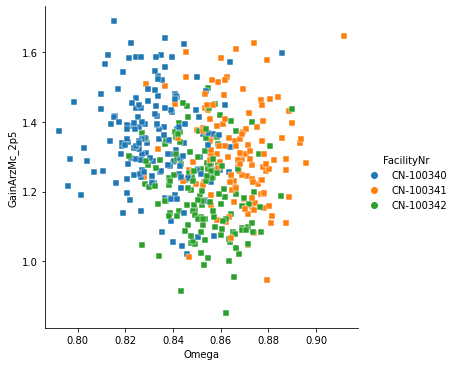

In [77]:
sns.relplot(data=dt,
           x="Omega",
           y="GainArzMc_2p5",
            hue="FacilityNr",
            hue_order=["CN-100340","CN-100341","CN-100342"],
            units="PmTrayId",
            marker="s",
           )

([<matplotlib.axis.XTick at 0x26fcca47670>],
 [Text(0, 0, '2021-11-10 00:09:48')])

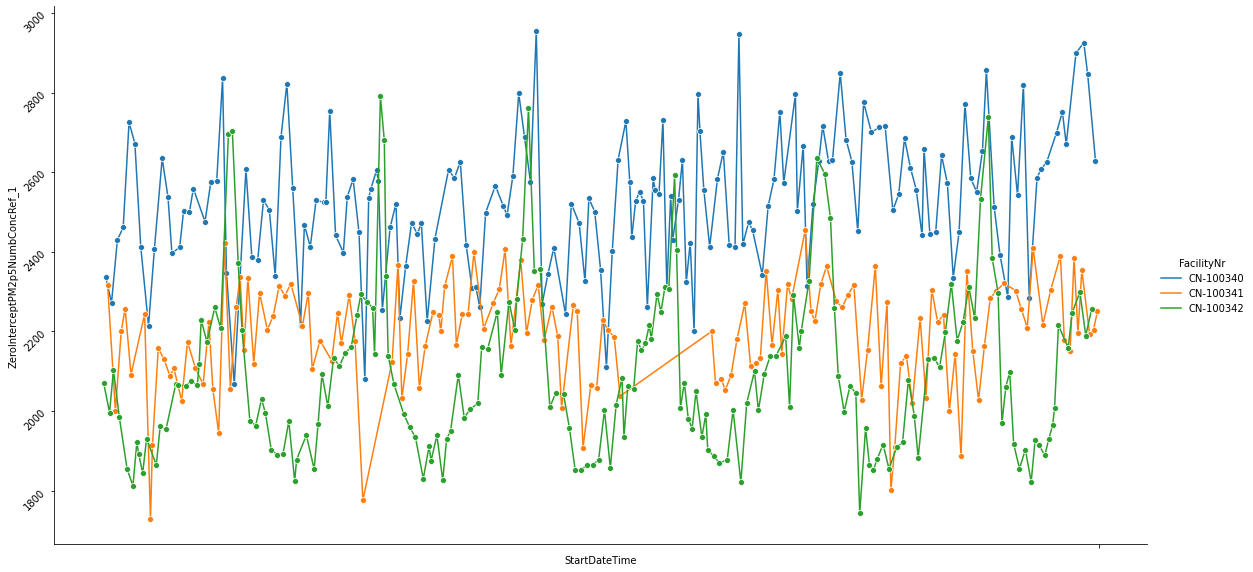

In [79]:
dt.drop_duplicates("StartDateTime",inplace=True)
sns.relplot(data=dt,
           x="StartDateTime",
           y="ZeroInterceptPM2p5NumbConcRef_1",
            kind='line',
            
            hue="FacilityNr",
            hue_order=["CN-100340","CN-100341","CN-100342"],
            height=8,     #axes的高度;
            aspect=2,     #height*aspect = width
            marker="o",

           
           )
plt.tick_params(labelrotation=45)
plt.xticks("")

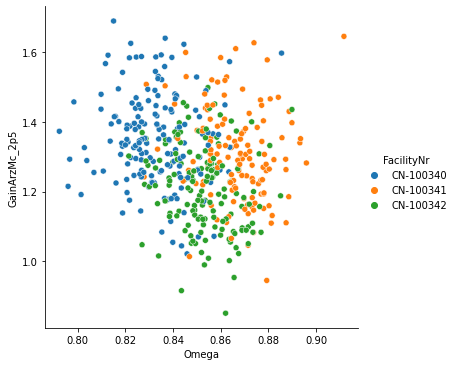

In [5]:
# fig = plt.figure(figsize=(14,8))
# ax = fig.add_subplot()
sns.relplot(data=dt,
           x="Omega",
           y="GainArzMc_2p5",
            hue="FacilityNr",
            hue_order=["CN-100340","CN-100341","CN-100342"],
            markers=["s","h",">"],
            legend="auto",
            kind="scatter",

           )

## scatterplot:绘制关系型散点图

## lineplot: 线型关系图

<AxesSubplot:xlabel='Omega', ylabel='GainArzMc_2p5'>

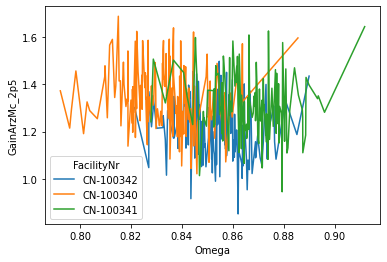

In [35]:
sns.lineplot(data=dt,x="Omega",y="GainArzMc_2p5",
             hue="FacilityNr",
             sort=True,          #
            )

# 分布图 Distribution plots

## displot:

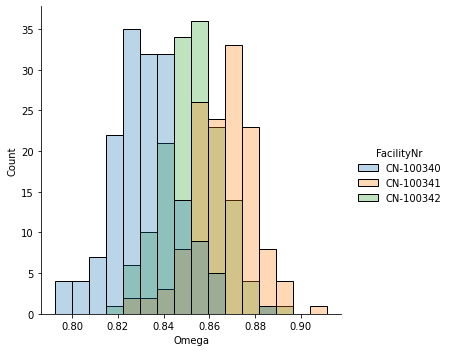

In [4]:
sns.displot(data=dt,
           x="Omega",
            hue="FacilityNr",
            hue_order=["CN-100340","CN-100341","CN-100342"],
           alpha=0.3,
            
           )

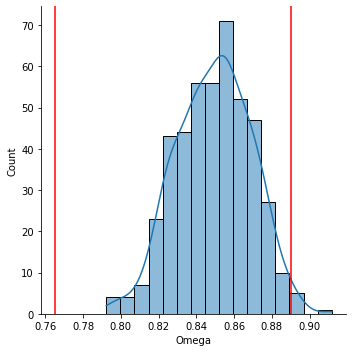

In [6]:
sns.displot(data=dt,
           x="Omega",
           kde=True,
#             hist=True,
           )
plt.axvline(0.765,c='r')
plt.axvline(0.89,c='r')

## histplot:

<AxesSubplot:xlabel='Omega', ylabel='Count'>

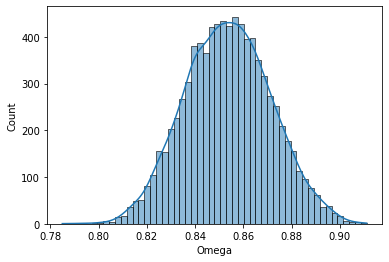

In [12]:
sns.histplot(data=snsdata,
            x="Omega",
             stat="count",
             kde=True,
            )

## kdeplot: 核密度估计图

In [7]:
dt.head(2)

,PmSetupId,ProductionOrder,BinCode,SubstrateSessionId,PmTrayId,PmRefId,PmRefCalibDate,PmPlaus1Id,PmPlaus2Id,RhTRef1Id,RhTRef2Id,RhTAtmId,RhTSagId,AtmHeatingDeviceCurrent,VoltageIn,VoltageSclTx,VoltageSdaRx,VoltageIfSelect,VoltageBoot,VoltageShieldTest,DutFirmwareMajorVersion,DutFirmwareMinorVersion,DeleteSuccessful,DeleteCalibrationSuccessful,ProductionDate,ProductionDateIsPass,ProductionDateIsWritten,NumberOfDuts,DeviceId,DeviceIdInternal,MicrocontrollerId,ReadLmCalibBin,ReadPmCalibBin,ReadAllBinsGoodQualityIndicator,AutoCleaningInterval_Reset,SetTargetFanSpeed,SetUpdateInterval,SetPeakThreshold,SetPeakClippingLimit,SetLaserSetPoint,SetNoiseSuppression,PhotoTicksLaserOff,PhotoTicksLaserOn,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,ZeroInterceptPM10p0NumbConcRef_1,ZeroInterceptPM10p0MeanPartMassRef_1,Pm0p5NumbConcSPS1Ratio_1,Pm1p0NumbConcSPS1Ratio_1,Pm2p5NumbConcSPS1Ratio_1,Pm4p0NumbConcSPS1Ratio_1,Pm10p0NumbConcSPS1Ratio_1,Pm1p0MassConcSPS1Ratio_1,Pm2p5MassConcSPS1Ratio_1,Pm4p0MassConcSPS1Ratio_1,Pm10p0MassConcSPS1Ratio_1,Pm0p5NumbConcSPS2Ratio_1,Pm1p0NumbConcSPS2Ratio_1,Pm2p5NumbConcSPS2Ratio_1,Pm4p0NumbConcSPS2Ratio_1,Pm10p0NumbConcSPS2Ratio_1,Pm1p0MassConcSPS2Ratio_1,Pm2p5MassConcSPS2Ratio_1,Pm4p0MassConcSPS2Ratio_1,Pm10p0MassConcSPS2Ratio_1,T1RefMean_1,Rh1RefMean_1,T2RefMean_1,RH2RefMean_1,TAtmRefMean_1,RhAtmRefMean_1,TSagRefMean_1,RhSagRefMean_1,AmbientPressureRefMean_1,AirFlowRefMean_1,TTsiMean_1,DecayRatePM2p5NumbConcRef_1,NoisePM2p5NumbConcRef_1,PreCleaningTime_1,PostCleanPm10P0NumbConcMean_1,PostCleanPm10P0MassConcMean_1,FanSpeedMedian_1,FanVoltageMedian_1,FanSpeedStd_1,FanVoltageStd_1,PmNormRate_1,TotalCounts_1,ZeroInterceptPM2p5NumbConcRef_2,ZeroInterceptPM2p5MeanPartMassRef_2,ZeroInterceptPM10p0NumbConcRef_2,ZeroInterceptPM10p0MeanPartMassRef_2,Pm0p5NumbConcSPS1Ratio_2,Pm1p0NumbConcSPS1Ratio_2,Pm2p5NumbConcSPS1Ratio_2,Pm4p0NumbConcSPS1Ratio_2,Pm10p0NumbConcSPS1Ratio_2,Pm1p0MassConcSPS1Ratio_2,Pm2p5MassConcSPS1Ratio_2,Pm4p0MassConcSPS1Ratio_2,Pm10p0MassConcSPS1Ratio_2,Pm0p5NumbConcSPS2Ratio_2,Pm1p0NumbConcSPS2Ratio_2,Pm2p5NumbConcSPS2Ratio_2,Pm4p0NumbConcSPS2Ratio_2,Pm10p0NumbConcSPS2Ratio_2,Pm1p0MassConcSPS2Ratio_2,Pm2p5MassConcSPS2Ratio_2,Pm4p0MassConcSPS2Ratio_2,Pm10p0MassConcSPS2Ratio_2,T1RefMean_2,Rh1RefMean_2,T2RefMean_2,RH2RefMean_2,TAtmRefMean_2,RhAtmRefMean_2,TSagRefMean_2,RhSagRefMean_2,AmbientPressureRefMean_2,AirFlowRefMean_2,TTsiMean_2,DecayRatePM2p5NumbConcRef_2,NoisePM2p5NumbConcRef_2,PreCleaningTime_2,PostCleanPm10P0NumbConcMean_2,PostCleanPm10P0MassConcMean_2,FanSpeedMedian_2,FanVoltageMedian_2,FanSpeedStd_2,FanVoltageStd_2,PmNormRate_2,TotalCounts_2,CalculationSuccessful,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,KclHyp_2,KclHyp_3,KclHyp_4,KclHyp_5,ArzHyp_0,ArzHyp_1,ArzHyp_2,ArzHyp_3,ArzHyp_4,ArzHyp_5,Omega,GainKclMc_0p5,GainKclMc_1p0,GainKclMc_2p5,GainKclMc_4p0,GainKclMc_10p0,GainKclNc_0p5,GainKclNc_1p0,GainKclNc_2p5,GainKclNc_4p0,GainKclNc_10p0,GainArzMc_0p5,GainArzMc_1p0,GainArzMc_2p5,GainArzMc_4p0,GainArzMc_10p0,GainArzNc_0p5,GainArzNc_1p0,GainArzNc_2p5,GainArzNc_4p0,GainArzNc_10p0,WriteCalibrationSuccessful,ZeroInterceptPM2p5NumbConcRef_Remeasurement,ZeroInterceptPM2p5MeanPartMassRef_Remeasurement,ZeroInterceptPM10p0NumbConcRef_Remeasurement,ZeroInterceptPM10p0MeanPartMassRef_Remeasurement,Pm0p5NumbConcSPS1Ratio_Remeasurement,Pm1p0NumbConcSPS1Ratio_Remeasurement,Pm2p5NumbConcSPS1Ratio_Remeasurement,Pm4p0NumbConcSPS1Ratio_Remeasurement,Pm10p0NumbConcSPS1Ratio_Remeasurement,Pm1p0MassConcSPS1Ratio_Remeasurement,Pm2p5MassConcSPS1Ratio_Remeasurement,Pm4p0MassConcSPS1Ratio_Remeasurement,Pm10p0MassConcSPS1Ratio_Remeasurement,Pm0p5NumbConcSPS2Ratio_Remeasurement,Pm1p0NumbConcSPS2Ratio_Remeasurement,Pm2p5NumbConcSPS2Ratio_Remeasurement,Pm4p0NumbConcSPS2Ratio_Remeasurement,Pm10p0NumbConcSPS2Ratio_Remeasurement,Pm1p0MassConcSPS2Ratio_Remeasurement,Pm2p5MassConcSPS2Ratio_Remeasurement,Pm4p0MassConcSPS2Ratio_Remeasurement,Pm10p0MassConcSPS2Ratio_Remeasurement,T1RefMean

<AxesSubplot:xlabel='Omega', ylabel='Density'>

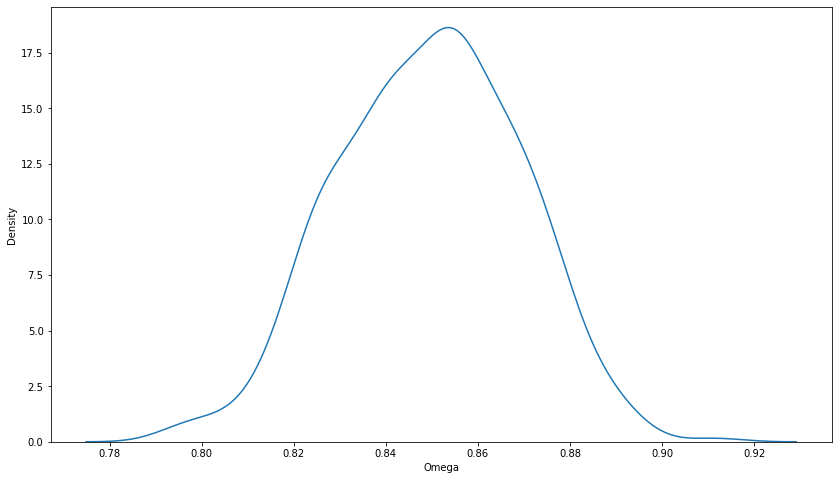

In [17]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

sns.kdeplot(data=dt,x="Omega",ax=ax,
#            common_norm=True,
           )

<AxesSubplot:xlabel='Density', ylabel='Omega'>

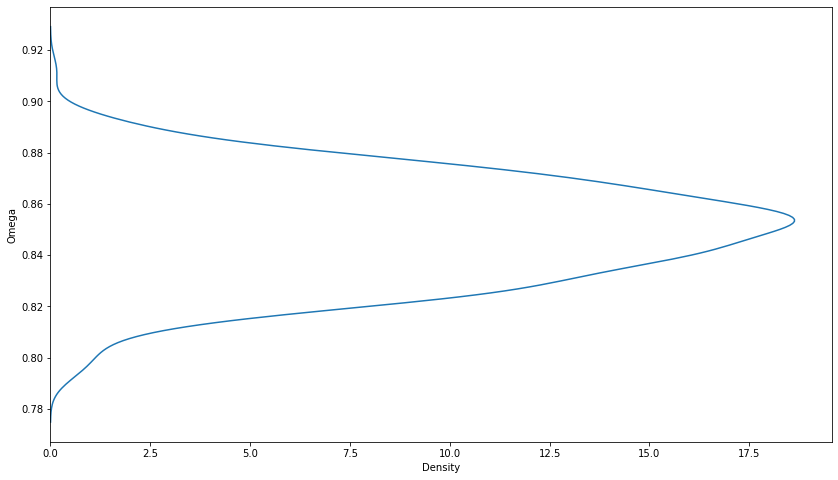

In [45]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

sns.kdeplot(data=dt,y="Omega",ax=ax)

<AxesSubplot:ylabel='Density'>

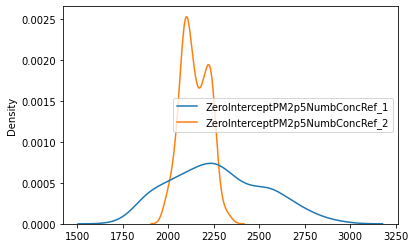

In [46]:
iris = dt[["ZeroInterceptPM2p5NumbConcRef_1","ZeroInterceptPM2p5NumbConcRef_2"]]
sns.kdeplot(data=iris)   #绘制所有列

<AxesSubplot:xlabel='Omega', ylabel='Density'>

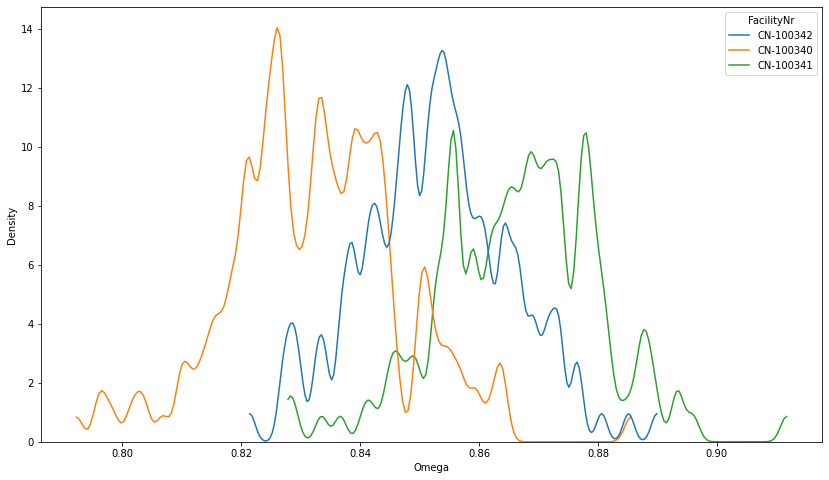

In [48]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

sns.kdeplot(data=dt,x="Omega",hue="FacilityNr",ax=ax,
           bw_adjust=0.2,   #曲线的光滑度  
            cut=0,        #Use more smoothing, but don’t smooth past the extreme data points:
           )

<AxesSubplot:xlabel='Omega', ylabel='Density'>

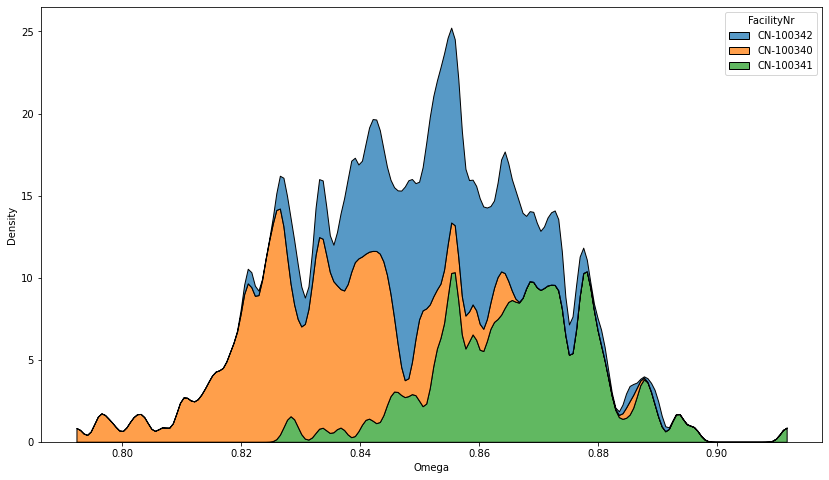

In [51]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

sns.kdeplot(data=dt,x="Omega",hue="FacilityNr",ax=ax,
           bw_adjust=0.2,   #曲线的光滑度  
            cut=0,        #Use more smoothing, but don’t smooth past the extreme data points:
            multiple="stack",     #填充样式 {“layer”, “stack”, “fill”}
           )

<AxesSubplot:xlabel='Omega', ylabel='Density'>

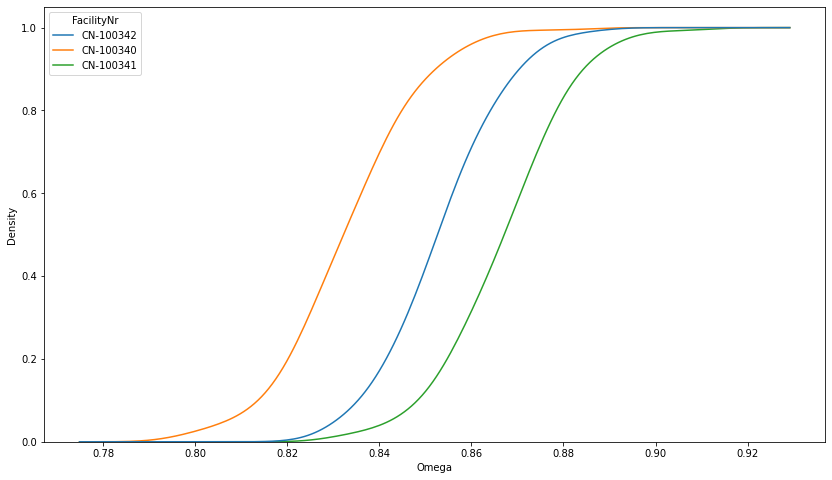

In [43]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot()

# 堆积分布:
sns.kdeplot(data=dt,x="Omega",hue="FacilityNr",ax=ax,
#             cumulative=True,
            common_norm=False,
            common_grid=True,
            
           )

In [ ]:
tips_agg = (tips.groupby("size").agg(total_bill=("total_bill", "mean"), n=("total_bill", "count")))

In [52]:
dt.head(2)

,PmSetupId,ProductionOrder,BinCode,SubstrateSessionId,PmTrayId,PmRefId,PmRefCalibDate,PmPlaus1Id,PmPlaus2Id,RhTRef1Id,RhTRef2Id,RhTAtmId,RhTSagId,AtmHeatingDeviceCurrent,VoltageIn,VoltageSclTx,VoltageSdaRx,VoltageIfSelect,VoltageBoot,VoltageShieldTest,DutFirmwareMajorVersion,DutFirmwareMinorVersion,DeleteSuccessful,DeleteCalibrationSuccessful,ProductionDate,ProductionDateIsPass,ProductionDateIsWritten,NumberOfDuts,DeviceId,DeviceIdInternal,MicrocontrollerId,ReadLmCalibBin,ReadPmCalibBin,ReadAllBinsGoodQualityIndicator,AutoCleaningInterval_Reset,SetTargetFanSpeed,SetUpdateInterval,SetPeakThreshold,SetPeakClippingLimit,SetLaserSetPoint,SetNoiseSuppression,PhotoTicksLaserOff,PhotoTicksLaserOn,PhotoTicksDiff,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5MeanPartMassRef_1,ZeroInterceptPM10p0NumbConcRef_1,ZeroInterceptPM10p0MeanPartMassRef_1,Pm0p5NumbConcSPS1Ratio_1,Pm1p0NumbConcSPS1Ratio_1,Pm2p5NumbConcSPS1Ratio_1,Pm4p0NumbConcSPS1Ratio_1,Pm10p0NumbConcSPS1Ratio_1,Pm1p0MassConcSPS1Ratio_1,Pm2p5MassConcSPS1Ratio_1,Pm4p0MassConcSPS1Ratio_1,Pm10p0MassConcSPS1Ratio_1,Pm0p5NumbConcSPS2Ratio_1,Pm1p0NumbConcSPS2Ratio_1,Pm2p5NumbConcSPS2Ratio_1,Pm4p0NumbConcSPS2Ratio_1,Pm10p0NumbConcSPS2Ratio_1,Pm1p0MassConcSPS2Ratio_1,Pm2p5MassConcSPS2Ratio_1,Pm4p0MassConcSPS2Ratio_1,Pm10p0MassConcSPS2Ratio_1,T1RefMean_1,Rh1RefMean_1,T2RefMean_1,RH2RefMean_1,TAtmRefMean_1,RhAtmRefMean_1,TSagRefMean_1,RhSagRefMean_1,AmbientPressureRefMean_1,AirFlowRefMean_1,TTsiMean_1,DecayRatePM2p5NumbConcRef_1,NoisePM2p5NumbConcRef_1,PreCleaningTime_1,PostCleanPm10P0NumbConcMean_1,PostCleanPm10P0MassConcMean_1,FanSpeedMedian_1,FanVoltageMedian_1,FanSpeedStd_1,FanVoltageStd_1,PmNormRate_1,TotalCounts_1,ZeroInterceptPM2p5NumbConcRef_2,ZeroInterceptPM2p5MeanPartMassRef_2,ZeroInterceptPM10p0NumbConcRef_2,ZeroInterceptPM10p0MeanPartMassRef_2,Pm0p5NumbConcSPS1Ratio_2,Pm1p0NumbConcSPS1Ratio_2,Pm2p5NumbConcSPS1Ratio_2,Pm4p0NumbConcSPS1Ratio_2,Pm10p0NumbConcSPS1Ratio_2,Pm1p0MassConcSPS1Ratio_2,Pm2p5MassConcSPS1Ratio_2,Pm4p0MassConcSPS1Ratio_2,Pm10p0MassConcSPS1Ratio_2,Pm0p5NumbConcSPS2Ratio_2,Pm1p0NumbConcSPS2Ratio_2,Pm2p5NumbConcSPS2Ratio_2,Pm4p0NumbConcSPS2Ratio_2,Pm10p0NumbConcSPS2Ratio_2,Pm1p0MassConcSPS2Ratio_2,Pm2p5MassConcSPS2Ratio_2,Pm4p0MassConcSPS2Ratio_2,Pm10p0MassConcSPS2Ratio_2,T1RefMean_2,Rh1RefMean_2,T2RefMean_2,RH2RefMean_2,TAtmRefMean_2,RhAtmRefMean_2,TSagRefMean_2,RhSagRefMean_2,AmbientPressureRefMean_2,AirFlowRefMean_2,TTsiMean_2,DecayRatePM2p5NumbConcRef_2,NoisePM2p5NumbConcRef_2,PreCleaningTime_2,PostCleanPm10P0NumbConcMean_2,PostCleanPm10P0MassConcMean_2,FanSpeedMedian_2,FanVoltageMedian_2,FanSpeedStd_2,FanVoltageStd_2,PmNormRate_2,TotalCounts_2,CalculationSuccessful,WarningCode,ErrorCode,KclHyp_0,KclHyp_1,KclHyp_2,KclHyp_3,KclHyp_4,KclHyp_5,ArzHyp_0,ArzHyp_1,ArzHyp_2,ArzHyp_3,ArzHyp_4,ArzHyp_5,Omega,GainKclMc_0p5,GainKclMc_1p0,GainKclMc_2p5,GainKclMc_4p0,GainKclMc_10p0,GainKclNc_0p5,GainKclNc_1p0,GainKclNc_2p5,GainKclNc_4p0,GainKclNc_10p0,GainArzMc_0p5,GainArzMc_1p0,GainArzMc_2p5,GainArzMc_4p0,GainArzMc_10p0,GainArzNc_0p5,GainArzNc_1p0,GainArzNc_2p5,GainArzNc_4p0,GainArzNc_10p0,WriteCalibrationSuccessful,ZeroInterceptPM2p5NumbConcRef_Remeasurement,ZeroInterceptPM2p5MeanPartMassRef_Remeasurement,ZeroInterceptPM10p0NumbConcRef_Remeasurement,ZeroInterceptPM10p0MeanPartMassRef_Remeasurement,Pm0p5NumbConcSPS1Ratio_Remeasurement,Pm1p0NumbConcSPS1Ratio_Remeasurement,Pm2p5NumbConcSPS1Ratio_Remeasurement,Pm4p0NumbConcSPS1Ratio_Remeasurement,Pm10p0NumbConcSPS1Ratio_Remeasurement,Pm1p0MassConcSPS1Ratio_Remeasurement,Pm2p5MassConcSPS1Ratio_Remeasurement,Pm4p0MassConcSPS1Ratio_Remeasurement,Pm10p0MassConcSPS1Ratio_Remeasurement,Pm0p5NumbConcSPS2Ratio_Remeasurement,Pm1p0NumbConcSPS2Ratio_Remeasurement,Pm2p5NumbConcSPS2Ratio_Remeasurement,Pm4p0NumbConcSPS2Ratio_Remeasurement,Pm10p0NumbConcSPS2Ratio_Remeasurement,Pm1p0MassConcSPS2Ratio_Remeasurement,Pm2p5MassConcSPS2Ratio_Remeasurement,Pm4p0MassConcSPS2Ratio_Remeasurement,Pm10p0MassConcSPS2Ratio_Remeasurement,T1RefMean

In [4]:
dt_agg = dt.groupby("FacilityNr").agg(omega_m = ("Omega","mean"), n=("Omega","count"))

In [5]:
dt_agg

,omega_m,n
FacilityNr,,
CN-100340,0.83,165
CN-100341,0.87,134
CN-100342,0.85,151


<AxesSubplot:xlabel='omega_m', ylabel='Density'>

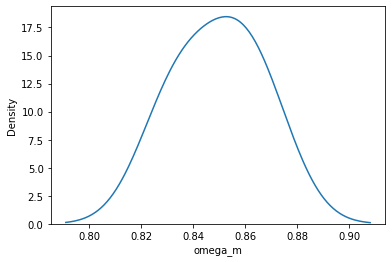

In [9]:
sns.kdeplot(data=dt_agg,
            x="omega_m",
            weights="n",    #权重
           )

<AxesSubplot:xlabel='ZeroInterceptPM2p5NumbConcRef_1', ylabel='Density'>

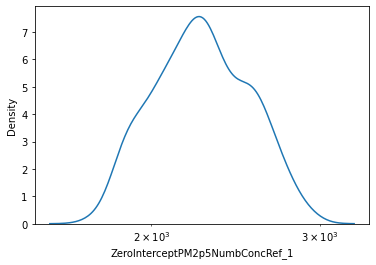

In [17]:
sns.kdeplot(data=dt,
            x="ZeroInterceptPM2p5NumbConcRef_1",
            log_scale=True,
           )

<AxesSubplot:xlabel='ZeroInterceptPM2p5NumbConcRef_1', ylabel='Density'>

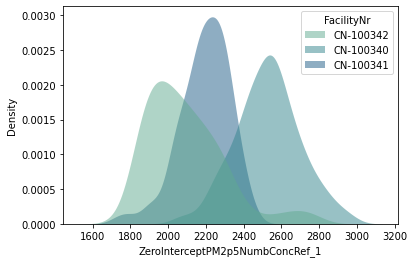

In [22]:
sns.kdeplot(data=dt,
            x="ZeroInterceptPM2p5NumbConcRef_1",
            hue="FacilityNr",
            fill=True,
            common_norm=False,    #True: 每一个density总量记为1;False: 所有density总量记为1
            palette="crest",      #多个density颜色
            alpha=0.5,
            linewidth=0,          #density边线
           )

<AxesSubplot:xlabel='ZeroInterceptPM2p5NumbConcRef_1', ylabel='Omega'>

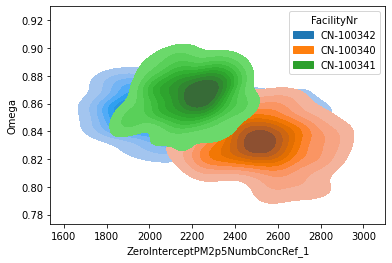

In [25]:
sns.kdeplot(data=dt,
            x="ZeroInterceptPM2p5NumbConcRef_1",
            y="Omega",
            hue="FacilityNr",
            fill=True,
           )

<AxesSubplot:xlabel='ZeroInterceptPM2p5NumbConcRef_1', ylabel='Omega'>

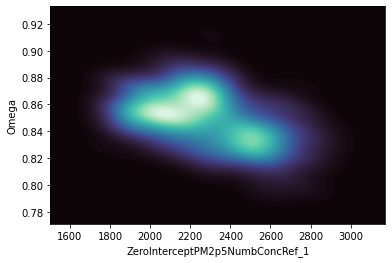

In [29]:
sns.kdeplot(data=dt,
            x="ZeroInterceptPM2p5NumbConcRef_1",
            y="Omega",
#             hue="FacilityNr",
            fill=True,
            cmap="mako",
            thresh=0,levels=100,
           )

## ecdfplot:累积分布图

<AxesSubplot:xlabel='Omega', ylabel='Proportion'>

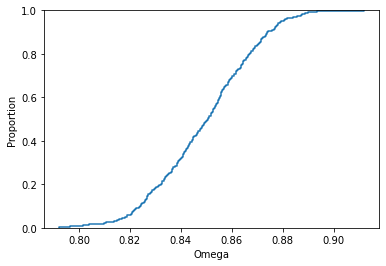

In [15]:
sns.ecdfplot(data=dt,x="Omega")   #x,y如果不指定,默认会将所有列进行展示

<AxesSubplot:xlabel='Omega', ylabel='Proportion'>

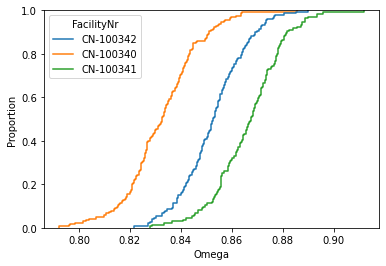

In [16]:
sns.ecdfplot(data=dt,
             x="Omega",
             hue="FacilityNr"
            
            )

<AxesSubplot:xlabel='Omega', ylabel='Count'>

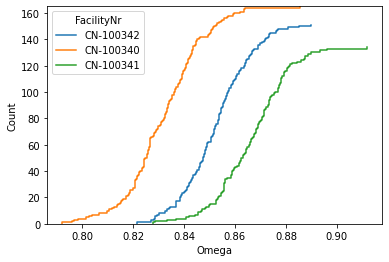

In [17]:
sns.ecdfplot(data=dt,
             x="Omega",
             hue="FacilityNr",
             stat="count"     #默认的分布统计信息已标准化以显示比例，但是您可以显示绝对计数
            
            )

<AxesSubplot:xlabel='Omega', ylabel='Count'>

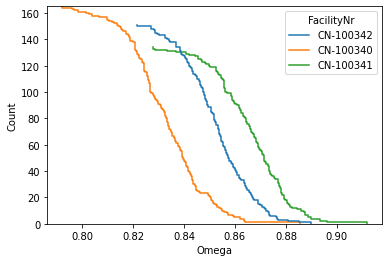

In [19]:
sns.ecdfplot(data=dt,
             x="Omega",
             hue="FacilityNr",
             stat="count",
             complementary=True,   #也可以绘制经验互补CDF(1-CDF)
            
            )

## rugplot:

<AxesSubplot:xlabel='Omega'>

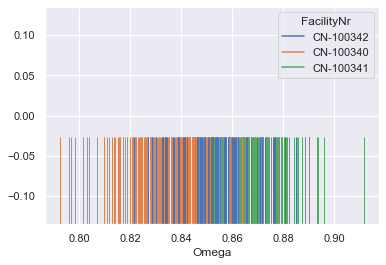

In [45]:
sns.set_theme()

# sns.kdeplot(data=dt,x="Omega")
sns.rugplot(data=dt,x="Omega",hue="FacilityNr",height=0.4)

# 分类统计图

## catplot: 分类型数据绘图

### Categorical scatterplots

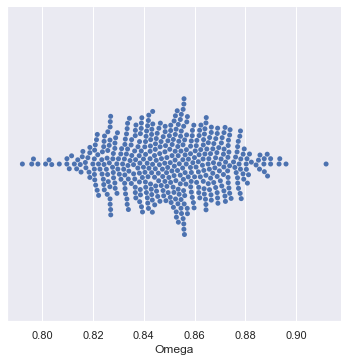

In [49]:
sns.catplot(data=dt,kind="swarm",x="Omega")

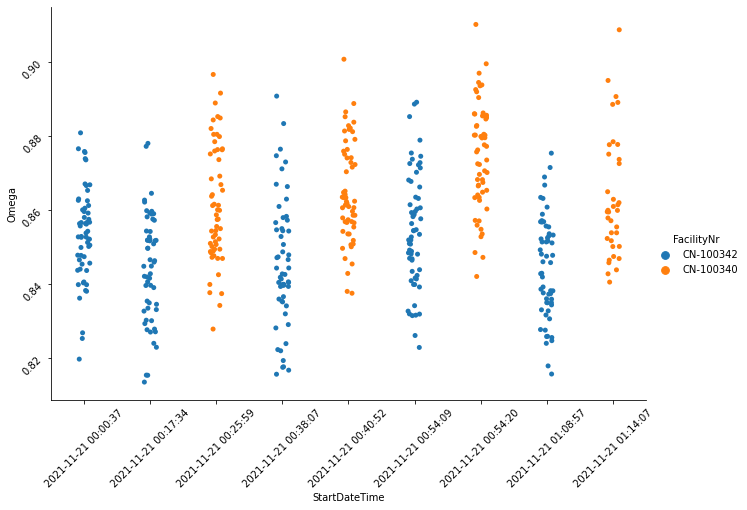

In [22]:
sns.catplot(data=snsdata.reset_index().dropna(axis=0,how="any",subset=["Omega"]).head(500),
            kind="strip",
            y="Omega",
            x="StartDateTime",   #加这个参数会很慢
            hue="FacilityNr",
            height=6,
            aspect=1.5
           )
plt.tick_params(labelrotation=45)

### Categorical distribution plots: 
    "box":"boxplot"; 
    "violin": "violinplot"
    "boxen": "boxen"

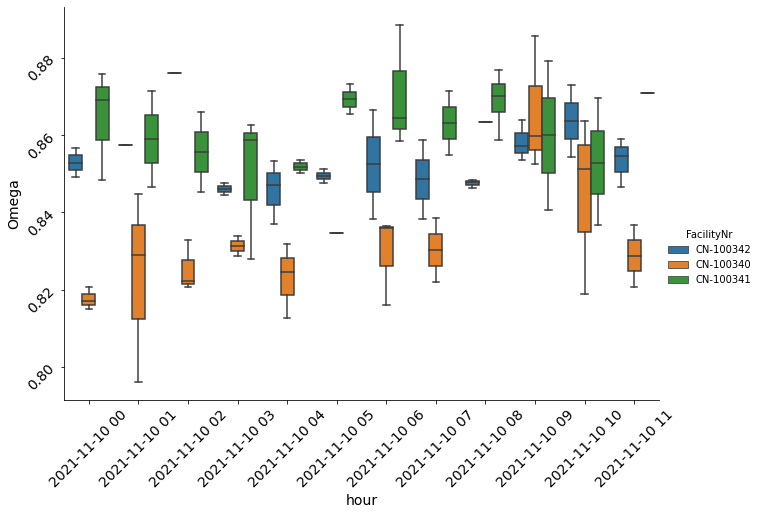

In [13]:
sns.catplot(data=dt.reset_index().head(100),
           kind="box",
           x="hour",
           y="Omega",
           hue="FacilityNr",
            height=6,
            aspect=1.5
           )

plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以

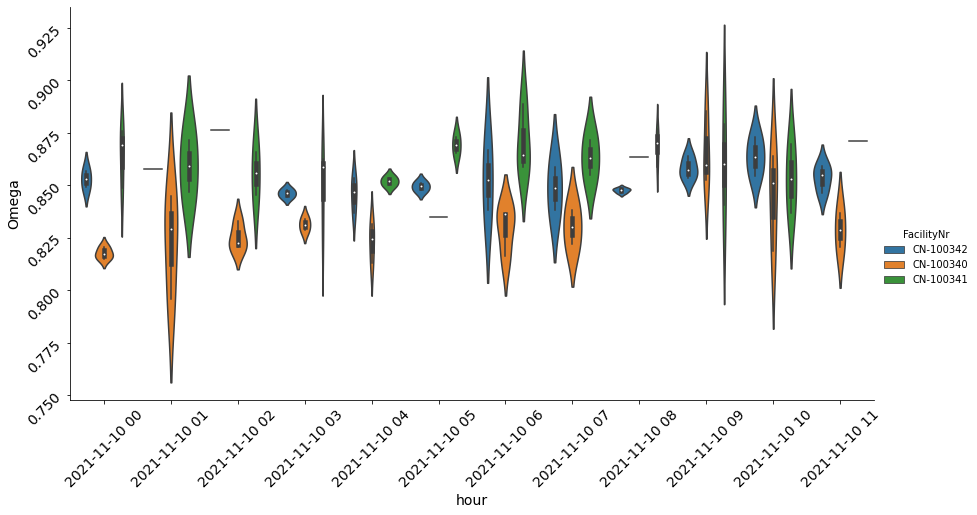

In [14]:
sns.catplot(data=dt.reset_index().head(100),
           kind="violin",
           x="hour",
           y="Omega",
           hue="FacilityNr",
            height=6,
            aspect=2
           )

plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以

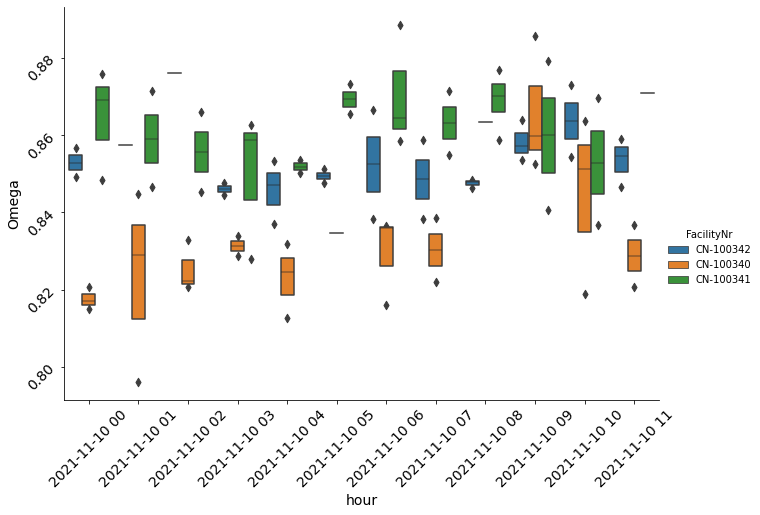

In [18]:
sns.catplot(data=dt.reset_index().head(100),
           kind="boxen",
           x="hour",
           y="Omega",
           hue="FacilityNr",
            height=6,
            aspect=1.5
           )

plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以

### Categrorical estimate plots:
    "point": "pointplot"
    "bar": "barplot"
    "count": "countplot"

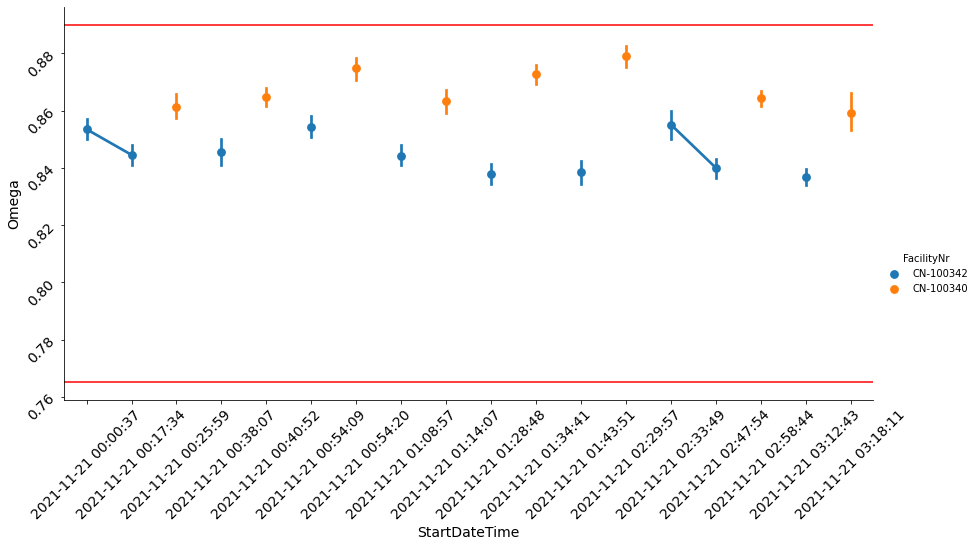

In [62]:
sns.catplot(data=snsdata[snsdata["Omega"].notna()].reset_index().head(1000),
           kind="point",
           x="StartDateTime",
           y="Omega",
           hue="FacilityNr",
            height=6,
            aspect=2,
#             join=False,
           estimator=np.mean
           )
plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以
plt.axhline(0.89,c='r')
plt.axhline(0.765,c='r')

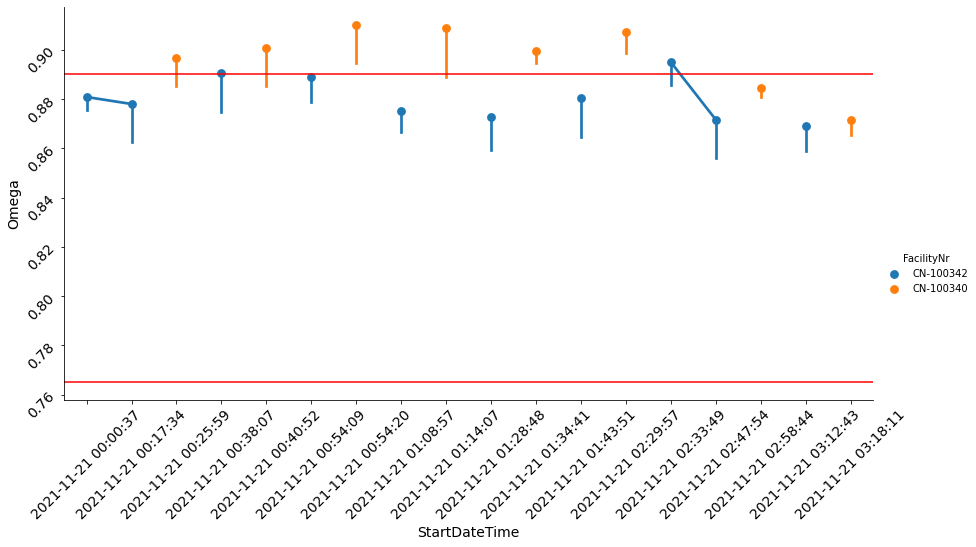

In [63]:
sns.catplot(data=snsdata[snsdata["Omega"].notna()].reset_index().head(1000),
           kind="point",
           x="StartDateTime",
           y="Omega",
           hue="FacilityNr",
            height=6,
            aspect=2,
#             join=False,
           estimator=np.max
           )
plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以
plt.axhline(0.89,c='r')
plt.axhline(0.765,c='r')

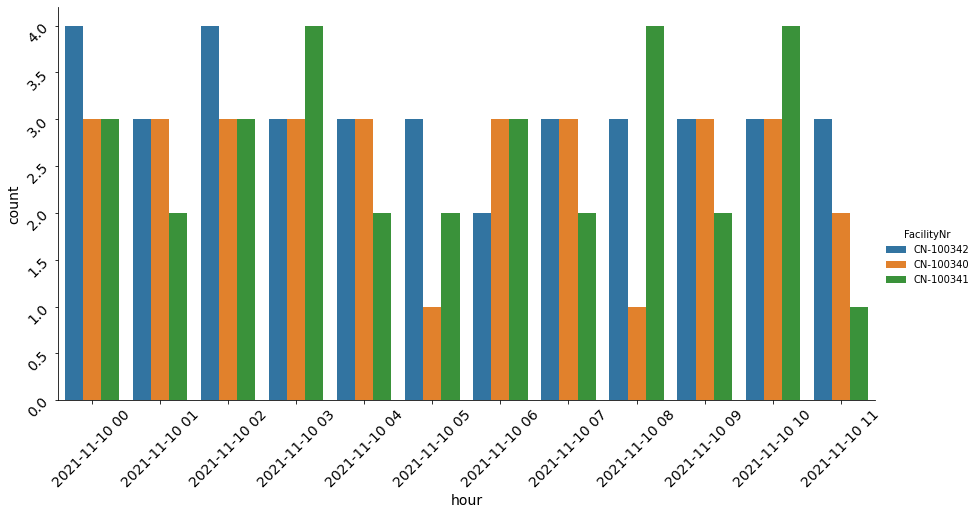

In [15]:

sns.catplot(data=dt.reset_index().head(100),
           kind="count",
           x="hour",
#            y="PostCleanPm10P0NumbConcMean_2",
           hue="FacilityNr",
#             saturation=0.5,
            ci=None,           #是否有胡须
            height=6,
            aspect=2
           )
plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以

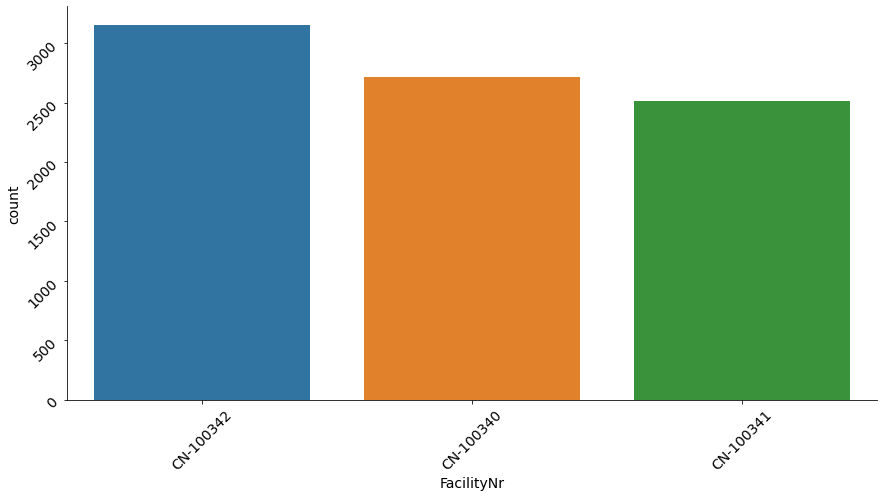

In [68]:
sns.catplot(data=snsdata[snsdata["Omega"].notna()].reset_index(),
           kind="count",
           x="FacilityNr",
#            y="Omega",
#            hue="FacilityNr",
            height=6,
            aspect=2,
#             join=False,
           )
plt.tick_params(labelsize=14,labelrotation=45)
mpl.rcParams["axes.labelsize"] = 14    #多运行两遍才可以

## stripplot

In [5]:
snsdata.head(2)

,PmSetupId,ProductionOrder,BinCode,SubstrateSessionId,PmTrayId,PmRefId,PmRefCalibDate,PmPlaus1Id,PmPlaus2Id,DeviceId,DeviceIdInternal,DeviceIdInternal_UTL,DeviceIdInternal_LTL,ReadPmCalibBin,ReadPmCalibBin_UTL,ReadPmCalibBin_LTL,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5NumbConcRef_1_UTL,ZeroInterceptPM2p5NumbConcRef_1_LTL,ZeroInterceptPM2p5MeanPartMassRef_1,ZeroInterceptPM2p5MeanPartMassRef_1_UTL,ZeroInterceptPM2p5MeanPartMassRef_1_LTL,ZeroInterceptPM10p0NumbConcRef_1,ZeroInterceptPM10p0NumbConcRef_1_UTL,ZeroInterceptPM10p0NumbConcRef_1_LTL,ZeroInterceptPM10p0MeanPartMassRef_1,ZeroInterceptPM10p0MeanPartMassRef_1_UTL,ZeroInterceptPM10p0MeanPartMassRef_1_LTL,Pm0p5NumbConcSPS1Ratio_1,Pm0p5NumbConcSPS1Ratio_1_UTL,Pm0p5NumbConcSPS1Ratio_1_LTL,Pm1p0NumbConcSPS1Ratio_1,Pm1p0NumbConcSPS1Ratio_1_UTL,Pm1p0NumbConcSPS1Ratio_1_LTL,Pm2p5NumbConcSPS1Ratio_1,Pm2p5NumbConcSPS1Ratio_1_UTL,Pm2p5NumbConcSPS1Ratio_1_LTL,Pm4p0NumbConcSPS1Ratio_1,Pm4p0NumbConcSPS1Ratio_1_UTL,Pm4p0NumbConcSPS1Ratio_1_LTL,Pm10p0NumbConcSPS1Ratio_1,Pm10p0NumbConcSPS1Ratio_1_UTL,Pm10p0NumbConcSPS1Ratio_1_LTL,Pm1p0MassConcSPS1Ratio_1,Pm1p0MassConcSPS1Ratio_1_UTL,Pm1p0MassConcSPS1Ratio_1_LTL,Pm2p5MassConcSPS1Ratio_1,Pm2p5MassConcSPS1Ratio_1_UTL,Pm2p5MassConcSPS1Ratio_1_LTL,Pm4p0MassConcSPS1Ratio_1,Pm4p0MassConcSPS1Ratio_1_UTL,Pm4p0MassConcSPS1Ratio_1_LTL,Pm10p0MassConcSPS1Ratio_1,Pm10p0MassConcSPS1Ratio_1_UTL,Pm10p0MassConcSPS1Ratio_1_LTL,Pm0p5NumbConcSPS2Ratio_1,Pm0p5NumbConcSPS2Ratio_1_UTL,Pm0p5NumbConcSPS2Ratio_1_LTL,Pm1p0NumbConcSPS2Ratio_1,Pm1p0NumbConcSPS2Ratio_1_UTL,Pm1p0NumbConcSPS2Ratio_1_LTL,Pm2p5NumbConcSPS2Ratio_1,Pm2p5NumbConcSPS2Ratio_1_UTL,Pm2p5NumbConcSPS2Ratio_1_LTL,Pm4p0NumbConcSPS2Ratio_1,Pm4p0NumbConcSPS2Ratio_1_UTL,Pm4p0NumbConcSPS2Ratio_1_LTL,Pm10p0NumbConcSPS2Ratio_1,Pm10p0NumbConcSPS2Ratio_1_UTL,Pm10p0NumbConcSPS2Ratio_1_LTL,Pm1p0MassConcSPS2Ratio_1,Pm1p0MassConcSPS2Ratio_1_UTL,Pm1p0MassConcSPS2Ratio_1_LTL,Pm2p5MassConcSPS2Ratio_1,Pm2p5MassConcSPS2Ratio_1_UTL,Pm2p5MassConcSPS2Ratio_1_LTL,Pm4p0MassConcSPS2Ratio_1,Pm4p0MassConcSPS2Ratio_1_UTL,Pm4p0MassConcSPS2Ratio_1_LTL,Pm10p0MassConcSPS2Ratio_1,Pm10p0MassConcSPS2Ratio_1_UTL,Pm10p0MassConcSPS2Ratio_1_LTL,DecayRatePM2p5NumbConcRef_1,DecayRatePM2p5NumbConcRef_1_UTL,DecayRatePM2p5NumbConcRef_1_LTL,NoisePM2p5NumbConcRef_1,NoisePM2p5NumbConcRef_1_UTL,NoisePM2p5NumbConcRef_1_LTL,PostCleanPm10P0NumbConcMean_1,PostCleanPm10P0NumbConcMean_1_UTL,PostCleanPm10P0NumbConcMean_1_LTL,PostCleanPm10P0MassConcMean_1,PostCleanPm10P0MassConcMean_1_UTL,PostCleanPm10P0MassConcMean_1_LTL,PmNormRate_1,PmNormRate_1_UTL,PmNormRate_1_LTL,TotalCounts_1,TotalCounts_1_UTL,TotalCounts_1_LTL,ZeroInterceptPM2p5NumbConcRef_2,ZeroInterceptPM2p5NumbConcRef_2_UTL,ZeroInterceptPM2p5NumbConcRef_2_LTL,ZeroInterceptPM2p5MeanPartMassRef_2,ZeroInterceptPM2p5MeanPartMassRef_2_UTL,ZeroInterceptPM2p5MeanPartMassRef_2_LTL,ZeroInterceptPM10p0NumbConcRef_2,ZeroInterceptPM10p0NumbConcRef_2_UTL,ZeroInterceptPM10p0NumbConcRef_2_LTL,ZeroInterceptPM10p0MeanPartMassRef_2,ZeroInterceptPM10p0MeanPartMassRef_2_UTL,ZeroInterceptPM10p0MeanPartMassRef_2_LTL,Pm0p5NumbConcSPS1Ratio_2,Pm0p5NumbConcSPS1Ratio_2_UTL,Pm0p5NumbConcSPS1Ratio_2_LTL,Pm1p0NumbConcSPS1Ratio_2,Pm1p0NumbConcSPS1Ratio_2_UTL,Pm1p0NumbConcSPS1Ratio_2_LTL,Pm2p5NumbConcSPS1Ratio_2,Pm2p5NumbConcSPS1Ratio_2_UTL,Pm2p5NumbConcSPS1Ratio_2_LTL,Pm4p0NumbConcSPS1Ratio_2,Pm4p0NumbConcSPS1Ratio_2_UTL,Pm4p0NumbConcSPS1Ratio_2_LTL,Pm10p0NumbConcSPS1Ratio_2,Pm10p0NumbConcSPS1Ratio_2_UTL,Pm10p0NumbConcSPS1Ratio_2_LTL,Pm1p0MassConcSPS1Ratio_2,Pm1p0MassConcSPS1Ratio_2_UTL,Pm1p0MassConcSPS1Ratio_2_LTL,Pm2p5MassConcSPS1Ratio_2,Pm2p5MassConcSPS1Ratio_2_UTL,Pm2p5MassConcSPS1Ratio_2_LTL,Pm4p0MassConcSPS1Ratio_2,Pm4p0MassConcSPS1Ratio_2_UTL,Pm4p0MassConcSPS1Ratio_2_LTL,Pm10p0MassConcSPS1Ratio_2,Pm10p0MassConcSPS1Ratio_2_UTL,Pm10p0MassConcSPS1Ratio_2_LTL,Pm0p5NumbConcSPS2Ratio_2,Pm0p5NumbConcSPS2Ratio_2_UTL,Pm0p5NumbConcSPS2Ratio_2_LTL,Pm1p0NumbConcSPS2Ratio_2,Pm1p0NumbConcSPS2Ratio_2_UTL,Pm1p0NumbConcSPS2R

<AxesSubplot:ylabel='Omega'>

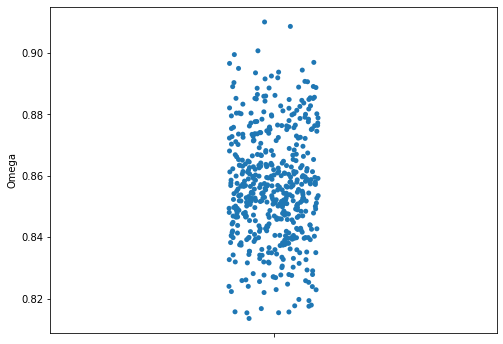

In [26]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

sns.stripplot(data=snsdata.reset_index().dropna(axis=0,how="any",subset=["Omega"]).head(500),
#              x="StartDateTime",
             y="Omega",
              hue="FacilityNr",
              ax=ax
             )
# plt.tick_params(labelrotation=45)

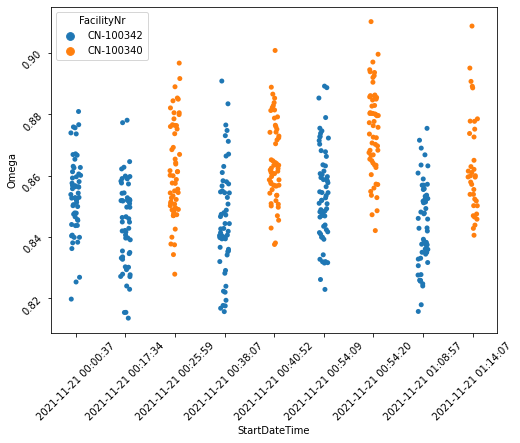

In [23]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

sns.stripplot(data=snsdata.reset_index().dropna(axis=0,how="any",subset=["Omega"]).head(500),
             x="StartDateTime",
             y="Omega",
              hue="FacilityNr",
              
              ax=ax
             )
plt.tick_params(labelrotation=45)

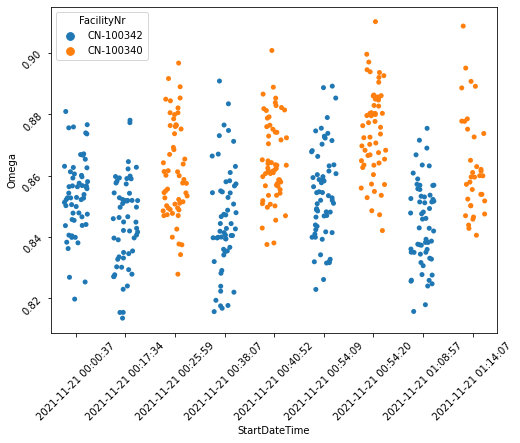

In [36]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

sns.stripplot(data=snsdata.reset_index().dropna(axis=0,how="any",subset=["Omega"]).head(500),
             x="StartDateTime",
             y="Omega",
              hue="FacilityNr",
              jitter=0.25,       #strip的宽度,避免因为点太多重叠在一起看不清
              ax=ax
             )
plt.tick_params(labelrotation=45)

C:\work\virtenvs\3p8_64bit_SensiPython_4p0\lib\site-packages\seaborn\categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)


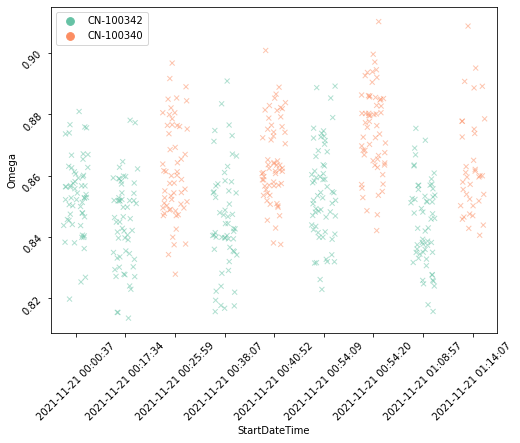

In [51]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

sns.stripplot(data=snsdata.reset_index().dropna(axis=0,how="any",subset=["Omega"]).head(500),
             x="StartDateTime",
             y="Omega",
              hue="FacilityNr",
              jitter=0.25,       #strip的宽度,避免因为点太多重叠在一起看不清
              
              marker="x",     #marker 相关的见marker属性
              size=5,      #marker size
#               color="b",
              edgecolor="r",   #marker edge color
              linewidth=1,     #marker edge linewidth
              alpha=0.5,
              
              palette="Set2",
              ax=ax,
             )
plt.tick_params(labelrotation=45)

C:\work\virtenvs\3p8_64bit_SensiPython_4p0\lib\site-packages\seaborn\categorical.py:1136: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(cat_pos, strip_data, **kws)


Text(0.5, 1.0, 'Omega distribution')

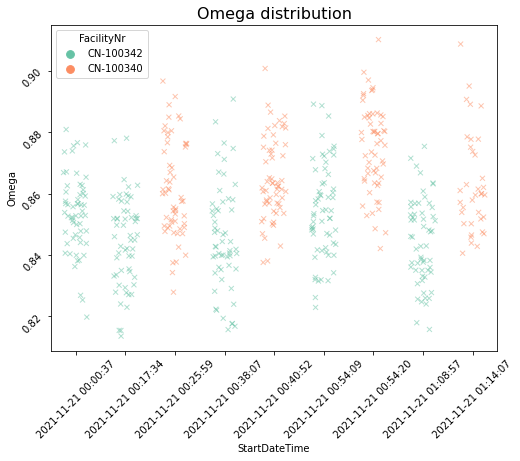

In [57]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

ax = sns.stripplot(data=snsdata.reset_index().dropna(axis=0,how="any",subset=["Omega"]).head(500),
             x="StartDateTime",
             y="Omega",
              hue="FacilityNr",
              jitter=0.25,       #strip的宽度,避免因为点太多重叠在一起看不清
              
              marker="x",     #marker 相关的见marker属性
              size=5,      #marker size
#               color="b",
              edgecolor="r",   #marker edge color
              linewidth=1,     #marker edge linewidth
              alpha=0.5,
              
              palette="Set2",
              ax=ax,
             )
plt.tick_params(labelrotation=45)
ax.set_title("Omega distribution",fontsize=16)

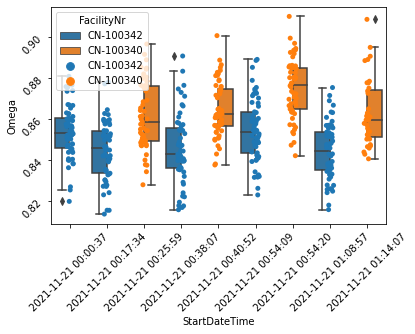

In [64]:
sns.boxplot(data=snsdata.dropna(axis=0,how="any",subset=["Omega"]).reset_index().head(500),
           x="StartDateTime",
           y="Omega",
            hue="FacilityNr"
            )
sns.stripplot(data=snsdata.dropna(axis=0,how="any",subset=["Omega"]).reset_index().head(500),
             x="StartDateTime",
             y="Omega",
             hue="FacilityNr")
plt.tick_params(labelrotation=45)


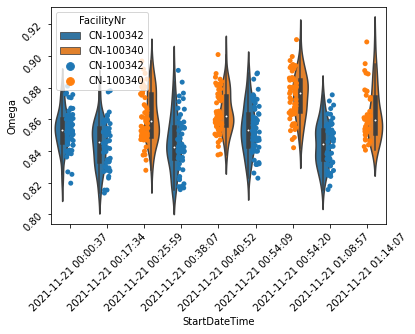

In [65]:
sns.violinplot(data=snsdata.dropna(axis=0,how="any",subset=["Omega"]).reset_index().head(500),
           x="StartDateTime",
           y="Omega",
            hue="FacilityNr"
            )
sns.stripplot(data=snsdata.dropna(axis=0,how="any",subset=["Omega"]).reset_index().head(500),
             x="StartDateTime",
             y="Omega",
             hue="FacilityNr")
plt.tick_params(labelrotation=45)

## swarmplot:

In [5]:
snsdata.head(2)

,PmSetupId,ProductionOrder,BinCode,SubstrateSessionId,PmTrayId,PmRefId,PmRefCalibDate,PmPlaus1Id,PmPlaus2Id,DeviceId,DeviceIdInternal,DeviceIdInternal_UTL,DeviceIdInternal_LTL,ReadPmCalibBin,ReadPmCalibBin_UTL,ReadPmCalibBin_LTL,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5NumbConcRef_1_UTL,ZeroInterceptPM2p5NumbConcRef_1_LTL,ZeroInterceptPM2p5MeanPartMassRef_1,ZeroInterceptPM2p5MeanPartMassRef_1_UTL,ZeroInterceptPM2p5MeanPartMassRef_1_LTL,ZeroInterceptPM10p0NumbConcRef_1,ZeroInterceptPM10p0NumbConcRef_1_UTL,ZeroInterceptPM10p0NumbConcRef_1_LTL,ZeroInterceptPM10p0MeanPartMassRef_1,ZeroInterceptPM10p0MeanPartMassRef_1_UTL,ZeroInterceptPM10p0MeanPartMassRef_1_LTL,Pm0p5NumbConcSPS1Ratio_1,Pm0p5NumbConcSPS1Ratio_1_UTL,Pm0p5NumbConcSPS1Ratio_1_LTL,Pm1p0NumbConcSPS1Ratio_1,Pm1p0NumbConcSPS1Ratio_1_UTL,Pm1p0NumbConcSPS1Ratio_1_LTL,Pm2p5NumbConcSPS1Ratio_1,Pm2p5NumbConcSPS1Ratio_1_UTL,Pm2p5NumbConcSPS1Ratio_1_LTL,Pm4p0NumbConcSPS1Ratio_1,Pm4p0NumbConcSPS1Ratio_1_UTL,Pm4p0NumbConcSPS1Ratio_1_LTL,Pm10p0NumbConcSPS1Ratio_1,Pm10p0NumbConcSPS1Ratio_1_UTL,Pm10p0NumbConcSPS1Ratio_1_LTL,Pm1p0MassConcSPS1Ratio_1,Pm1p0MassConcSPS1Ratio_1_UTL,Pm1p0MassConcSPS1Ratio_1_LTL,Pm2p5MassConcSPS1Ratio_1,Pm2p5MassConcSPS1Ratio_1_UTL,Pm2p5MassConcSPS1Ratio_1_LTL,Pm4p0MassConcSPS1Ratio_1,Pm4p0MassConcSPS1Ratio_1_UTL,Pm4p0MassConcSPS1Ratio_1_LTL,Pm10p0MassConcSPS1Ratio_1,Pm10p0MassConcSPS1Ratio_1_UTL,Pm10p0MassConcSPS1Ratio_1_LTL,Pm0p5NumbConcSPS2Ratio_1,Pm0p5NumbConcSPS2Ratio_1_UTL,Pm0p5NumbConcSPS2Ratio_1_LTL,Pm1p0NumbConcSPS2Ratio_1,Pm1p0NumbConcSPS2Ratio_1_UTL,Pm1p0NumbConcSPS2Ratio_1_LTL,Pm2p5NumbConcSPS2Ratio_1,Pm2p5NumbConcSPS2Ratio_1_UTL,Pm2p5NumbConcSPS2Ratio_1_LTL,Pm4p0NumbConcSPS2Ratio_1,Pm4p0NumbConcSPS2Ratio_1_UTL,Pm4p0NumbConcSPS2Ratio_1_LTL,Pm10p0NumbConcSPS2Ratio_1,Pm10p0NumbConcSPS2Ratio_1_UTL,Pm10p0NumbConcSPS2Ratio_1_LTL,Pm1p0MassConcSPS2Ratio_1,Pm1p0MassConcSPS2Ratio_1_UTL,Pm1p0MassConcSPS2Ratio_1_LTL,Pm2p5MassConcSPS2Ratio_1,Pm2p5MassConcSPS2Ratio_1_UTL,Pm2p5MassConcSPS2Ratio_1_LTL,Pm4p0MassConcSPS2Ratio_1,Pm4p0MassConcSPS2Ratio_1_UTL,Pm4p0MassConcSPS2Ratio_1_LTL,Pm10p0MassConcSPS2Ratio_1,Pm10p0MassConcSPS2Ratio_1_UTL,Pm10p0MassConcSPS2Ratio_1_LTL,DecayRatePM2p5NumbConcRef_1,DecayRatePM2p5NumbConcRef_1_UTL,DecayRatePM2p5NumbConcRef_1_LTL,NoisePM2p5NumbConcRef_1,NoisePM2p5NumbConcRef_1_UTL,NoisePM2p5NumbConcRef_1_LTL,PostCleanPm10P0NumbConcMean_1,PostCleanPm10P0NumbConcMean_1_UTL,PostCleanPm10P0NumbConcMean_1_LTL,PostCleanPm10P0MassConcMean_1,PostCleanPm10P0MassConcMean_1_UTL,PostCleanPm10P0MassConcMean_1_LTL,PmNormRate_1,PmNormRate_1_UTL,PmNormRate_1_LTL,TotalCounts_1,TotalCounts_1_UTL,TotalCounts_1_LTL,ZeroInterceptPM2p5NumbConcRef_2,ZeroInterceptPM2p5NumbConcRef_2_UTL,ZeroInterceptPM2p5NumbConcRef_2_LTL,ZeroInterceptPM2p5MeanPartMassRef_2,ZeroInterceptPM2p5MeanPartMassRef_2_UTL,ZeroInterceptPM2p5MeanPartMassRef_2_LTL,ZeroInterceptPM10p0NumbConcRef_2,ZeroInterceptPM10p0NumbConcRef_2_UTL,ZeroInterceptPM10p0NumbConcRef_2_LTL,ZeroInterceptPM10p0MeanPartMassRef_2,ZeroInterceptPM10p0MeanPartMassRef_2_UTL,ZeroInterceptPM10p0MeanPartMassRef_2_LTL,Pm0p5NumbConcSPS1Ratio_2,Pm0p5NumbConcSPS1Ratio_2_UTL,Pm0p5NumbConcSPS1Ratio_2_LTL,Pm1p0NumbConcSPS1Ratio_2,Pm1p0NumbConcSPS1Ratio_2_UTL,Pm1p0NumbConcSPS1Ratio_2_LTL,Pm2p5NumbConcSPS1Ratio_2,Pm2p5NumbConcSPS1Ratio_2_UTL,Pm2p5NumbConcSPS1Ratio_2_LTL,Pm4p0NumbConcSPS1Ratio_2,Pm4p0NumbConcSPS1Ratio_2_UTL,Pm4p0NumbConcSPS1Ratio_2_LTL,Pm10p0NumbConcSPS1Ratio_2,Pm10p0NumbConcSPS1Ratio_2_UTL,Pm10p0NumbConcSPS1Ratio_2_LTL,Pm1p0MassConcSPS1Ratio_2,Pm1p0MassConcSPS1Ratio_2_UTL,Pm1p0MassConcSPS1Ratio_2_LTL,Pm2p5MassConcSPS1Ratio_2,Pm2p5MassConcSPS1Ratio_2_UTL,Pm2p5MassConcSPS1Ratio_2_LTL,Pm4p0MassConcSPS1Ratio_2,Pm4p0MassConcSPS1Ratio_2_UTL,Pm4p0MassConcSPS1Ratio_2_LTL,Pm10p0MassConcSPS1Ratio_2,Pm10p0MassConcSPS1Ratio_2_UTL,Pm10p0MassConcSPS1Ratio_2_LTL,Pm0p5NumbConcSPS2Ratio_2,Pm0p5NumbConcSPS2Ratio_2_UTL,Pm0p5NumbConcSPS2Ratio_2_LTL,Pm1p0NumbConcSPS2Ratio_2,Pm1p0NumbConcSPS2Ratio_2_UTL,Pm1p0NumbConcSPS2R

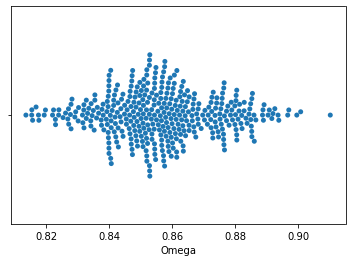

In [11]:
# 画一个简单的蜂群图
ax = sns.swarmplot(data=snsdata.head(500),
                  x = "Omega")

C:\work\virtenvs\3p8_64bit_SensiPython_4p0\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\work\virtenvs\3p8_64bit_SensiPython_4p0\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\work\virtenvs\3p8_64bit_SensiPython_4p0\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\work\virtenvs\3p8_64bit_SensiPython_4p0\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\work\virtenvs\3p8_64bit_Sensi

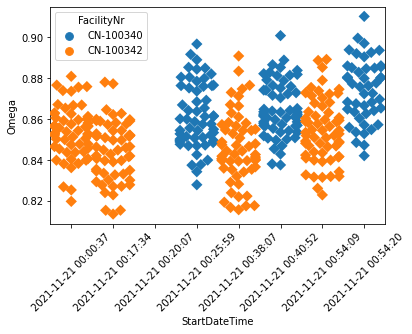

In [28]:
# 对蜂群进行分组:
ax = sns.swarmplot(data=snsdata.head(500).reset_index(),
                  x="StartDateTime",
                  y = "Omega",
                  hue="FacilityNr",
#                    dodge=True,      #比如两台设备的数据是统一时间点的,True:把同一时间点的数据分为两组
                  hue_order = ["CN-100340","CN-100342"],
                   
#                    marker相关参数
                   size=8,
                   marker='D'
                  )
plt.tick_params(labelrotation=45,axis='x')

C:\work\virtenvs\3p8_64bit_SensiPython_4p0\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


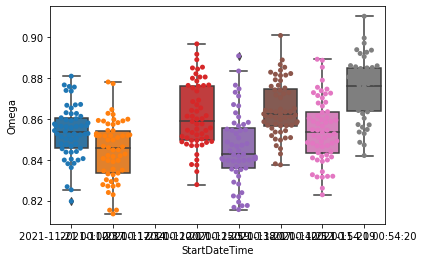

In [31]:
ax = sns.boxplot(data=snsdata.head(500).reset_index(),
                x="StartDateTime",
                y="Omega")
ax = sns.swarmplot(data=snsdata.head(500).reset_index(),
                 x="StartDateTime",
                 y = "Omega",
                 
                 )

## boxplot:

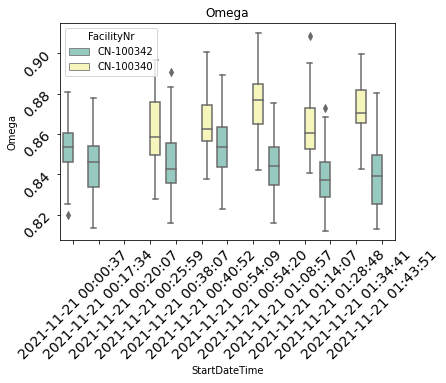

In [50]:
ax = sns.boxplot(data=snsdata.reset_index().head(800),
                x="StartDateTime",
                y="Omega",
                hue="FacilityNr",
                 palette="Set3",

                )
ax.set_title("Omega")
plt.tick_params(labelrotation=45,labelsize=14)

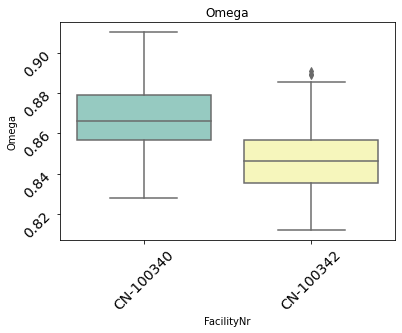

In [52]:
ax = sns.boxplot(data=snsdata.reset_index().head(800),
                x="FacilityNr",
                y="Omega",
                 palette="Set3",
                 order=["CN-100340","CN-100342"],

                )
ax.set_title("Omega")
plt.tick_params(labelrotation=45,labelsize=14)

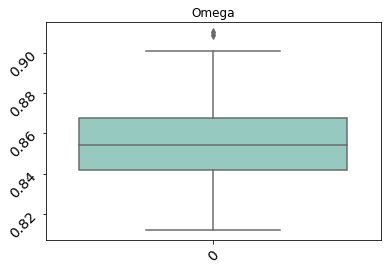

In [63]:
ax = sns.boxplot(data=snsdata.reset_index().head(800)["Omega"],

                 orient="v",
                 palette="Set3",

                )
ax.set_title("Omega")
plt.tick_params(labelrotation=45,labelsize=14)

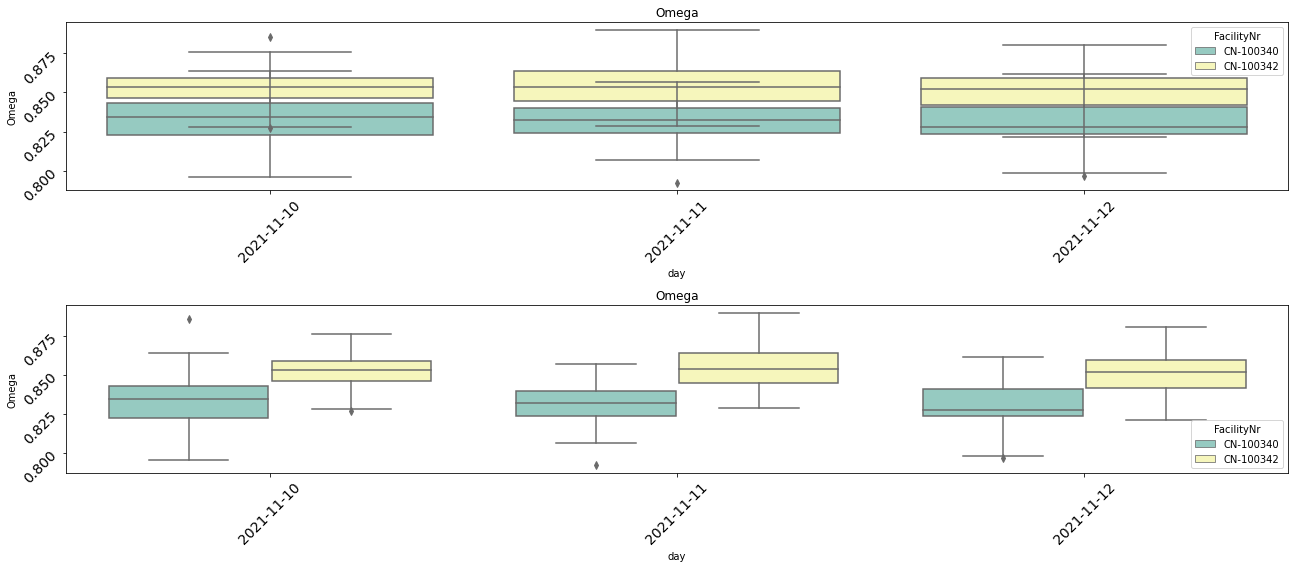

In [38]:
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(211)
axsns = sns.boxplot(data=dt.reset_index(),
                x="day",
                y="Omega",
                 hue="FacilityNr",
                 palette="Set3",
                 hue_order=["CN-100340","CN-100342"],
                 dodge=False,
                 ax = ax1,

                )
ax1.set_title("Omega")
plt.tick_params(labelrotation=45,labelsize=14)


ax2 = fig.add_subplot(212)
axsns = sns.boxplot(data=dt.reset_index(),
                x="day",
                y="Omega",
                 hue="FacilityNr",
                 palette="Set3",
                 hue_order=["CN-100340","CN-100342"],
                 dodge=True,  #default:True,比如两台设备的数据是统一时间点的,True:把同一时间点的数据分为两组
                 ax = ax2,

                )
ax2.set_title("Omega")
plt.tick_params(labelrotation=45,labelsize=14)

plt.tight_layout()


## violinplot:小提琴图

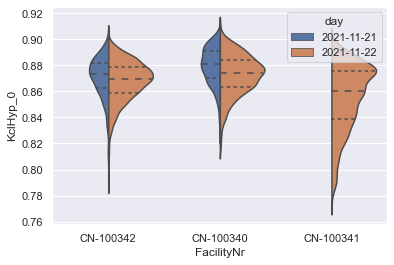

In [4]:
ax = sns.violinplot(data=snsdata,
              x = "FacilityNr",
              # order=["CN-100340","CN-100341","CN-100342"],
              y="KclHyp_0",
               
               hue="day",
               paleete="husl",
               split=True,      #只有hue是两组数据的时候有效
               inner="quartile",   #“box”, “quartile”, “point”, “stick”, None
               scale="count",      #如何决定 plot的宽度,
                scale_hue=True,    #Scale the density relative to the counts across all bins:
             )

In [7]:
snsdata.head(2)

,PmSetupId,ProductionOrder,BinCode,SubstrateSessionId,PmTrayId,PmRefId,PmRefCalibDate,PmPlaus1Id,PmPlaus2Id,DeviceId,DeviceIdInternal,DeviceIdInternal_UTL,DeviceIdInternal_LTL,ReadPmCalibBin,ReadPmCalibBin_UTL,ReadPmCalibBin_LTL,ZeroInterceptPM2p5NumbConcRef_1,ZeroInterceptPM2p5NumbConcRef_1_UTL,ZeroInterceptPM2p5NumbConcRef_1_LTL,ZeroInterceptPM2p5MeanPartMassRef_1,ZeroInterceptPM2p5MeanPartMassRef_1_UTL,ZeroInterceptPM2p5MeanPartMassRef_1_LTL,ZeroInterceptPM10p0NumbConcRef_1,ZeroInterceptPM10p0NumbConcRef_1_UTL,ZeroInterceptPM10p0NumbConcRef_1_LTL,ZeroInterceptPM10p0MeanPartMassRef_1,ZeroInterceptPM10p0MeanPartMassRef_1_UTL,ZeroInterceptPM10p0MeanPartMassRef_1_LTL,Pm0p5NumbConcSPS1Ratio_1,Pm0p5NumbConcSPS1Ratio_1_UTL,Pm0p5NumbConcSPS1Ratio_1_LTL,Pm1p0NumbConcSPS1Ratio_1,Pm1p0NumbConcSPS1Ratio_1_UTL,Pm1p0NumbConcSPS1Ratio_1_LTL,Pm2p5NumbConcSPS1Ratio_1,Pm2p5NumbConcSPS1Ratio_1_UTL,Pm2p5NumbConcSPS1Ratio_1_LTL,Pm4p0NumbConcSPS1Ratio_1,Pm4p0NumbConcSPS1Ratio_1_UTL,Pm4p0NumbConcSPS1Ratio_1_LTL,Pm10p0NumbConcSPS1Ratio_1,Pm10p0NumbConcSPS1Ratio_1_UTL,Pm10p0NumbConcSPS1Ratio_1_LTL,Pm1p0MassConcSPS1Ratio_1,Pm1p0MassConcSPS1Ratio_1_UTL,Pm1p0MassConcSPS1Ratio_1_LTL,Pm2p5MassConcSPS1Ratio_1,Pm2p5MassConcSPS1Ratio_1_UTL,Pm2p5MassConcSPS1Ratio_1_LTL,Pm4p0MassConcSPS1Ratio_1,Pm4p0MassConcSPS1Ratio_1_UTL,Pm4p0MassConcSPS1Ratio_1_LTL,Pm10p0MassConcSPS1Ratio_1,Pm10p0MassConcSPS1Ratio_1_UTL,Pm10p0MassConcSPS1Ratio_1_LTL,Pm0p5NumbConcSPS2Ratio_1,Pm0p5NumbConcSPS2Ratio_1_UTL,Pm0p5NumbConcSPS2Ratio_1_LTL,Pm1p0NumbConcSPS2Ratio_1,Pm1p0NumbConcSPS2Ratio_1_UTL,Pm1p0NumbConcSPS2Ratio_1_LTL,Pm2p5NumbConcSPS2Ratio_1,Pm2p5NumbConcSPS2Ratio_1_UTL,Pm2p5NumbConcSPS2Ratio_1_LTL,Pm4p0NumbConcSPS2Ratio_1,Pm4p0NumbConcSPS2Ratio_1_UTL,Pm4p0NumbConcSPS2Ratio_1_LTL,Pm10p0NumbConcSPS2Ratio_1,Pm10p0NumbConcSPS2Ratio_1_UTL,Pm10p0NumbConcSPS2Ratio_1_LTL,Pm1p0MassConcSPS2Ratio_1,Pm1p0MassConcSPS2Ratio_1_UTL,Pm1p0MassConcSPS2Ratio_1_LTL,Pm2p5MassConcSPS2Ratio_1,Pm2p5MassConcSPS2Ratio_1_UTL,Pm2p5MassConcSPS2Ratio_1_LTL,Pm4p0MassConcSPS2Ratio_1,Pm4p0MassConcSPS2Ratio_1_UTL,Pm4p0MassConcSPS2Ratio_1_LTL,Pm10p0MassConcSPS2Ratio_1,Pm10p0MassConcSPS2Ratio_1_UTL,Pm10p0MassConcSPS2Ratio_1_LTL,DecayRatePM2p5NumbConcRef_1,DecayRatePM2p5NumbConcRef_1_UTL,DecayRatePM2p5NumbConcRef_1_LTL,NoisePM2p5NumbConcRef_1,NoisePM2p5NumbConcRef_1_UTL,NoisePM2p5NumbConcRef_1_LTL,PostCleanPm10P0NumbConcMean_1,PostCleanPm10P0NumbConcMean_1_UTL,PostCleanPm10P0NumbConcMean_1_LTL,PostCleanPm10P0MassConcMean_1,PostCleanPm10P0MassConcMean_1_UTL,PostCleanPm10P0MassConcMean_1_LTL,PmNormRate_1,PmNormRate_1_UTL,PmNormRate_1_LTL,TotalCounts_1,TotalCounts_1_UTL,TotalCounts_1_LTL,ZeroInterceptPM2p5NumbConcRef_2,ZeroInterceptPM2p5NumbConcRef_2_UTL,ZeroInterceptPM2p5NumbConcRef_2_LTL,ZeroInterceptPM2p5MeanPartMassRef_2,ZeroInterceptPM2p5MeanPartMassRef_2_UTL,ZeroInterceptPM2p5MeanPartMassRef_2_LTL,ZeroInterceptPM10p0NumbConcRef_2,ZeroInterceptPM10p0NumbConcRef_2_UTL,ZeroInterceptPM10p0NumbConcRef_2_LTL,ZeroInterceptPM10p0MeanPartMassRef_2,ZeroInterceptPM10p0MeanPartMassRef_2_UTL,ZeroInterceptPM10p0MeanPartMassRef_2_LTL,Pm0p5NumbConcSPS1Ratio_2,Pm0p5NumbConcSPS1Ratio_2_UTL,Pm0p5NumbConcSPS1Ratio_2_LTL,Pm1p0NumbConcSPS1Ratio_2,Pm1p0NumbConcSPS1Ratio_2_UTL,Pm1p0NumbConcSPS1Ratio_2_LTL,Pm2p5NumbConcSPS1Ratio_2,Pm2p5NumbConcSPS1Ratio_2_UTL,Pm2p5NumbConcSPS1Ratio_2_LTL,Pm4p0NumbConcSPS1Ratio_2,Pm4p0NumbConcSPS1Ratio_2_UTL,Pm4p0NumbConcSPS1Ratio_2_LTL,Pm10p0NumbConcSPS1Ratio_2,Pm10p0NumbConcSPS1Ratio_2_UTL,Pm10p0NumbConcSPS1Ratio_2_LTL,Pm1p0MassConcSPS1Ratio_2,Pm1p0MassConcSPS1Ratio_2_UTL,Pm1p0MassConcSPS1Ratio_2_LTL,Pm2p5MassConcSPS1Ratio_2,Pm2p5MassConcSPS1Ratio_2_UTL,Pm2p5MassConcSPS1Ratio_2_LTL,Pm4p0MassConcSPS1Ratio_2,Pm4p0MassConcSPS1Ratio_2_UTL,Pm4p0MassConcSPS1Ratio_2_LTL,Pm10p0MassConcSPS1Ratio_2,Pm10p0MassConcSPS1Ratio_2_UTL,Pm10p0MassConcSPS1Ratio_2_LTL,Pm0p5NumbConcSPS2Ratio_2,Pm0p5NumbConcSPS2Ratio_2_UTL,Pm0p5NumbConcSPS2Ratio_2_LTL,Pm1p0NumbConcSPS2Ratio_2,Pm1p0NumbConcSPS2Ratio_2_UTL,Pm1p0NumbConcSPS2R

In [15]:
snsdata.day.unique()

array(['2021-11-21', '2021-11-22'], dtype=object)

# set

In [3]:
sns.set(style="darkgrid")